# Performance of LLM Paraphrase Augmented Dataset

## Import Libraries

In [1]:
import datasets
from datasets import Dataset, Features, Value, concatenate_datasets
from dataset_concat import augment_data, MODE
from rnn_pipeline import TextClassificationPipeline, ModelType

## Download and Prepare Rotten Tomatoes Dataset

In [2]:
original_train_data, original_test_data = datasets.load_dataset("rotten_tomatoes", split=["train", "test"])

features = Features({
    "text": Value("string"),
    "label": Value("int64")
})
original_train_data = Dataset.from_dict({
    "text": original_train_data["text"],
    "label": original_train_data["label"]
}, features=features)

original_train_data[0]

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'label': 1}

## Augment Data set with 5%, 10%, 20%, 50%, 100%, 200% LLM Paraphrase

Augmented datapoints are concatenated into the original dataset to increase the size by 5%, 10%, 20%, 50%, 100%, 200% respectively.

In [4]:
# Augment by 5%, 10%, 20%, 50%, 100%, 200%
percentage= {
    MODE.LLM.PARAPHRASE: 0.05,
}
augmented_llm_paraphrase_5 = augment_data(original_train_data, percentage)
percentage= {
    MODE.LLM.PARAPHRASE: 0.10,
}
augmented_llm_summarizer_10 = augment_data(original_train_data, percentage)
percentage= {
    MODE.LLM.PARAPHRASE: 0.20,
}
augmented_llm_summarizer_20 = augment_data(original_train_data, percentage)
percentage= {
    MODE.LLM.PARAPHRASE: 0.50,
}
augmented_llm_summarizer_50 = augment_data(original_train_data, percentage)
percentage= {
    MODE.LLM.PARAPHRASE: 1.00,
}
augmented_llm_summarizer_100 = augment_data(original_train_data, percentage)
percentage= {
    MODE.LLM.PARAPHRASE: 2.00,
}
augmented_llm_summarizer_200 = augment_data(original_train_data, percentage)

# Convert augmented data into Datasets
augmented_llm_summarizer_5_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_llm_paraphrase_5],
    "label": [item["label"] for item in augmented_llm_paraphrase_5]
}, features=features)

augmented_llm_summarizer_10_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_llm_summarizer_10],
    "label": [item["label"] for item in augmented_llm_summarizer_10]
}, features=features)

augmented_llm_summarizer_20_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_llm_summarizer_20],
    "label": [item["label"] for item in augmented_llm_summarizer_20]
}, features=features)

augmented_llm_summarizer_50_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_llm_summarizer_50],
    "label": [item["label"] for item in augmented_llm_summarizer_50]
}, features=features)

augmented_llm_summarizer_100_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_llm_summarizer_100],
    "label": [item["label"] for item in augmented_llm_summarizer_100]
}, features=features)

augmented_llm_summarizer_200_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_llm_summarizer_200],
    "label": [item["label"] for item in augmented_llm_summarizer_200]
}, features=features)

# Concatenate original and augmented datasets
augmented_llm_summarizer_train_data_5 = concatenate_datasets([original_train_data, augmented_llm_summarizer_5_dataset])
augmented_llm_summarizer_train_data_10 = concatenate_datasets([original_train_data, augmented_llm_summarizer_10_dataset])
augmented_llm_summarizer_train_data_20 = concatenate_datasets([original_train_data, augmented_llm_summarizer_20_dataset])
augmented_llm_summarizer_train_data_50 = concatenate_datasets([original_train_data, augmented_llm_summarizer_50_dataset])
augmented_llm_summarizer_train_data_100 = concatenate_datasets([original_train_data, augmented_llm_summarizer_100_dataset])
augmented_llm_summarizer_train_data_200 = concatenate_datasets([original_train_data, augmented_llm_summarizer_200_dataset])

print(f"Original train size: {len(original_train_data)}")
print(f"Train size after 5% Paraphrase augmentation: {len(augmented_llm_summarizer_train_data_5)}")
print(f"Train size after 10% Paraphrase augmentation: {len(augmented_llm_summarizer_train_data_10)}")
print(f"Train size after 20% Paraphrase augmentation: {len(augmented_llm_summarizer_train_data_20)}")
print(f"Train size after 50% Paraphrase augmentation: {len(augmented_llm_summarizer_train_data_50)}")
print(f"Train size after 100% Paraphrase augmentation: {len(augmented_llm_summarizer_train_data_100)}")
print(f"Train size after 200% Paraphrase augmentation: {len(augmented_llm_summarizer_train_data_200)}")

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

c:\Users\dexter\AppData\Local\pypoetry\Cache\virtualenvs\nlarge-egHm7VgB-py3.12\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\dexter\.cache\huggingface\hub\models--facebook--bart-large-cnn. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Your max_length is set to 100, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)
Your max_length is set to 100, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)
Your max_length is set to 100, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 100, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)
Your

KeyboardInterrupt: 

Takes too much compute to augment the dataset, we have exported and load the augmented datasets

In [3]:
from datasets import load_from_disk

path_to_datasets = "C:\\Users\\dexter\\Documents\\NN Group Assignment\\SC4001\\example\\llm-datasets\\"

augmented_llm_summarizer_train_data_5 = load_from_disk(path_to_datasets+"augmented_llm_paraphrase_train_data_5")
augmented_llm_summarizer_train_data_10 = load_from_disk(path_to_datasets+"augmented_llm_paraphrase_train_data_10")
augmented_llm_summarizer_train_data_20 = load_from_disk(path_to_datasets+"augmented_llm_paraphrase_train_data_20")
augmented_llm_summarizer_train_data_50 = load_from_disk(path_to_datasets+"augmented_llm_paraphrase_train_data_50")
augmented_llm_summarizer_train_data_100 = load_from_disk(path_to_datasets+"augmented_llm_paraphrase_train_data_100")
augmented_llm_summarizer_train_data_200 = load_from_disk(path_to_datasets+"augmented_llm_paraphrase_train_data_200")

print(f"Original train size: {len(original_train_data)}")
print(f"Train size after 5% Paraphrase augmentation: {len(augmented_llm_summarizer_train_data_5)}")
print(f"Train size after 10% Paraphrase augmentation: {len(augmented_llm_summarizer_train_data_10)}")
print(f"Train size after 20% Paraphrase augmentation: {len(augmented_llm_summarizer_train_data_20)}")
print(f"Train size after 50% Paraphrase augmentation: {len(augmented_llm_summarizer_train_data_50)}")
print(f"Train size after 100% Paraphrase augmentation: {len(augmented_llm_summarizer_train_data_100)}")
print(f"Train size after 200% Paraphrase augmentation: {len(augmented_llm_summarizer_train_data_200)}")

Original train size: 8530
Train size after 5% Paraphrase augmentation: 8956
Train size after 10% Paraphrase augmentation: 9382
Train size after 20% Paraphrase augmentation: 10235
Train size after 50% Paraphrase augmentation: 12794
Train size after 100% Paraphrase augmentation: 17058
Train size after 200% Paraphrase augmentation: 25586


## Using the Augmented Datasets on the Same RNN Text Classifier Pipeline

In [4]:
pipeline_summarizer_5 = TextClassificationPipeline(
    augmented_data=augmented_llm_summarizer_train_data_5, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)

pipeline_summarizer_10 = TextClassificationPipeline(
    augmented_data=augmented_llm_summarizer_train_data_10, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)

pipeline_summarizer_20 = TextClassificationPipeline(
    augmented_data=augmented_llm_summarizer_train_data_20, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)

pipeline_summarizer_50 = TextClassificationPipeline(
    augmented_data=augmented_llm_summarizer_train_data_50, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)

pipeline_summarizer_100 = TextClassificationPipeline(
    augmented_data=augmented_llm_summarizer_train_data_100, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)

pipeline_summarizer_200 = TextClassificationPipeline(
    augmented_data=augmented_llm_summarizer_train_data_200, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)

Map:   0%|          | 0/7164 [00:00<?, ? examples/s]

Map:   0%|          | 0/1792 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7505 [00:00<?, ? examples/s]

Map:   0%|          | 0/1877 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/8188 [00:00<?, ? examples/s]

Map:   0%|          | 0/2047 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10235 [00:00<?, ? examples/s]

Map:   0%|          | 0/2559 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/13646 [00:00<?, ? examples/s]

Map:   0%|          | 0/3412 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/20468 [00:00<?, ? examples/s]

Map:   0%|          | 0/5118 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

## Model Training

In [5]:
pipeline_summarizer_5.train_model(n_epochs=10)
pipeline_summarizer_10.train_model(n_epochs=10)
pipeline_summarizer_20.train_model(n_epochs=10)
pipeline_summarizer_50.train_model(n_epochs=10)
pipeline_summarizer_100.train_model(n_epochs=10)
pipeline_summarizer_200.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.89it/s]


Epoch: 1/10
Train Loss: 0.678, Train Acc: 0.581
Valid Loss: 0.644, Valid Acc: 0.643


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.75it/s]


Epoch: 2/10
Train Loss: 0.609, Train Acc: 0.690
Valid Loss: 0.586, Valid Acc: 0.717


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.71it/s]


Epoch: 3/10
Train Loss: 0.567, Train Acc: 0.738
Valid Loss: 0.576, Valid Acc: 0.720


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  6.29it/s]


Epoch: 4/10
Train Loss: 0.543, Train Acc: 0.767
Valid Loss: 0.567, Valid Acc: 0.729


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.25it/s]


Epoch: 5/10
Train Loss: 0.530, Train Acc: 0.780
Valid Loss: 0.561, Valid Acc: 0.734


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.82it/s]


Epoch: 6/10
Train Loss: 0.509, Train Acc: 0.804
Valid Loss: 0.553, Valid Acc: 0.742


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.26it/s]


Epoch: 7/10
Train Loss: 0.491, Train Acc: 0.824
Valid Loss: 0.555, Valid Acc: 0.745


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.29it/s]


Epoch: 8/10
Train Loss: 0.475, Train Acc: 0.841
Valid Loss: 0.556, Valid Acc: 0.748


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.37it/s]


Epoch: 9/10
Train Loss: 0.462, Train Acc: 0.854
Valid Loss: 0.557, Valid Acc: 0.742


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.30it/s]


Epoch: 10/10
Train Loss: 0.449, Train Acc: 0.871
Valid Loss: 0.554, Valid Acc: 0.749


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.44it/s]


Epoch: 1/10
Train Loss: 0.670, Train Acc: 0.609
Valid Loss: 0.625, Valid Acc: 0.680


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.46it/s]


Epoch: 2/10
Train Loss: 0.602, Train Acc: 0.701
Valid Loss: 0.577, Valid Acc: 0.727


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.22it/s]


Epoch: 3/10
Train Loss: 0.564, Train Acc: 0.746
Valid Loss: 0.559, Valid Acc: 0.741


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.39it/s]


Epoch: 4/10
Train Loss: 0.537, Train Acc: 0.774
Valid Loss: 0.553, Valid Acc: 0.749


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.82it/s]


Epoch: 5/10
Train Loss: 0.515, Train Acc: 0.798
Valid Loss: 0.546, Valid Acc: 0.753


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.86it/s]


Epoch: 6/10
Train Loss: 0.504, Train Acc: 0.808
Valid Loss: 0.544, Valid Acc: 0.753


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.99it/s]


Epoch: 7/10
Train Loss: 0.488, Train Acc: 0.827
Valid Loss: 0.544, Valid Acc: 0.755


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.36it/s]


Epoch: 8/10
Train Loss: 0.472, Train Acc: 0.844
Valid Loss: 0.545, Valid Acc: 0.755


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.44it/s]


Epoch: 9/10
Train Loss: 0.462, Train Acc: 0.853
Valid Loss: 0.545, Valid Acc: 0.757


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.29it/s]


Epoch: 10/10
Train Loss: 0.452, Train Acc: 0.863
Valid Loss: 0.546, Valid Acc: 0.757


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.03it/s]


Epoch: 1/10
Train Loss: 0.666, Train Acc: 0.611
Valid Loss: 0.646, Valid Acc: 0.644


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.58it/s]


Epoch: 2/10
Train Loss: 0.610, Train Acc: 0.694
Valid Loss: 0.598, Valid Acc: 0.700


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.66it/s]


Epoch: 3/10
Train Loss: 0.561, Train Acc: 0.741
Valid Loss: 0.583, Valid Acc: 0.719


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.70it/s]


Epoch: 4/10
Train Loss: 0.538, Train Acc: 0.771
Valid Loss: 0.570, Valid Acc: 0.725


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  6.49it/s]


Epoch: 5/10
Train Loss: 0.515, Train Acc: 0.795
Valid Loss: 0.565, Valid Acc: 0.731


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  6.87it/s]


Epoch: 6/10
Train Loss: 0.497, Train Acc: 0.816
Valid Loss: 0.566, Valid Acc: 0.729


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.63it/s]


Epoch: 7/10
Train Loss: 0.483, Train Acc: 0.831
Valid Loss: 0.564, Valid Acc: 0.734


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.09it/s]


Epoch: 8/10
Train Loss: 0.470, Train Acc: 0.845
Valid Loss: 0.560, Valid Acc: 0.744


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.09it/s]


Epoch: 9/10
Train Loss: 0.458, Train Acc: 0.859
Valid Loss: 0.558, Valid Acc: 0.743


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.07it/s]


Epoch: 10/10
Train Loss: 0.451, Train Acc: 0.864
Valid Loss: 0.561, Valid Acc: 0.744


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  7.28it/s]


Epoch: 1/10
Train Loss: 0.662, Train Acc: 0.618
Valid Loss: 0.633, Valid Acc: 0.660


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.95it/s]


Epoch: 2/10
Train Loss: 0.601, Train Acc: 0.702
Valid Loss: 0.590, Valid Acc: 0.700


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  7.28it/s]


Epoch: 3/10
Train Loss: 0.560, Train Acc: 0.746
Valid Loss: 0.574, Valid Acc: 0.720


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  7.07it/s]


Epoch: 4/10
Train Loss: 0.539, Train Acc: 0.768
Valid Loss: 0.566, Valid Acc: 0.736


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  7.15it/s]


Epoch: 5/10
Train Loss: 0.519, Train Acc: 0.790
Valid Loss: 0.566, Valid Acc: 0.729


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  5.35it/s]


Epoch: 6/10
Train Loss: 0.504, Train Acc: 0.804
Valid Loss: 0.559, Valid Acc: 0.735


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.88it/s]


Epoch: 7/10
Train Loss: 0.484, Train Acc: 0.830
Valid Loss: 0.557, Valid Acc: 0.739


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  7.32it/s]


Epoch: 8/10
Train Loss: 0.469, Train Acc: 0.847
Valid Loss: 0.559, Valid Acc: 0.735


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  7.44it/s]


Epoch: 9/10
Train Loss: 0.458, Train Acc: 0.858
Valid Loss: 0.557, Valid Acc: 0.741


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  7.19it/s]


Epoch: 10/10
Train Loss: 0.449, Train Acc: 0.868
Valid Loss: 0.557, Valid Acc: 0.741


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.96it/s]


Epoch: 1/10
Train Loss: 0.655, Train Acc: 0.631
Valid Loss: 0.607, Valid Acc: 0.693


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.11it/s]


Epoch: 2/10
Train Loss: 0.582, Train Acc: 0.717
Valid Loss: 0.574, Valid Acc: 0.727


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.82it/s]


Epoch: 3/10
Train Loss: 0.551, Train Acc: 0.753
Valid Loss: 0.562, Valid Acc: 0.738


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  7.61it/s]


Epoch: 4/10
Train Loss: 0.529, Train Acc: 0.778
Valid Loss: 0.557, Valid Acc: 0.743


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  8.16it/s]


Epoch: 5/10
Train Loss: 0.506, Train Acc: 0.804
Valid Loss: 0.558, Valid Acc: 0.736


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  8.18it/s]


Epoch: 6/10
Train Loss: 0.492, Train Acc: 0.818
Valid Loss: 0.557, Valid Acc: 0.738


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  8.28it/s]


Epoch: 7/10
Train Loss: 0.481, Train Acc: 0.832
Valid Loss: 0.556, Valid Acc: 0.743


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  8.33it/s]


Epoch: 8/10
Train Loss: 0.463, Train Acc: 0.850
Valid Loss: 0.553, Valid Acc: 0.748


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  8.21it/s]


Epoch: 9/10
Train Loss: 0.450, Train Acc: 0.865
Valid Loss: 0.552, Valid Acc: 0.748


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  8.34it/s]


Epoch: 10/10
Train Loss: 0.441, Train Acc: 0.876
Valid Loss: 0.555, Valid Acc: 0.747


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  7.72it/s]


Epoch: 1/10
Train Loss: 0.632, Train Acc: 0.651
Valid Loss: 0.604, Valid Acc: 0.685


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  7.82it/s]


Epoch: 2/10
Train Loss: 0.568, Train Acc: 0.733
Valid Loss: 0.567, Valid Acc: 0.725


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  8.14it/s]


Epoch: 3/10
Train Loss: 0.533, Train Acc: 0.772
Valid Loss: 0.555, Valid Acc: 0.744


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  7.93it/s]


Epoch: 4/10
Train Loss: 0.513, Train Acc: 0.797
Valid Loss: 0.550, Valid Acc: 0.745


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  7.89it/s]


Epoch: 5/10
Train Loss: 0.492, Train Acc: 0.819
Valid Loss: 0.549, Valid Acc: 0.747


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  7.99it/s]


Epoch: 6/10
Train Loss: 0.474, Train Acc: 0.838
Valid Loss: 0.549, Valid Acc: 0.747


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  7.30it/s]


Epoch: 7/10
Train Loss: 0.463, Train Acc: 0.849
Valid Loss: 0.549, Valid Acc: 0.751


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  8.00it/s]


Epoch: 8/10
Train Loss: 0.451, Train Acc: 0.862
Valid Loss: 0.549, Valid Acc: 0.750


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  8.06it/s]


Epoch: 9/10
Train Loss: 0.442, Train Acc: 0.871
Valid Loss: 0.553, Valid Acc: 0.747


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  7.14it/s]

Epoch: 10/10
Train Loss: 0.440, Train Acc: 0.874
Valid Loss: 0.550, Valid Acc: 0.752


## Performance of Augmented Datasets

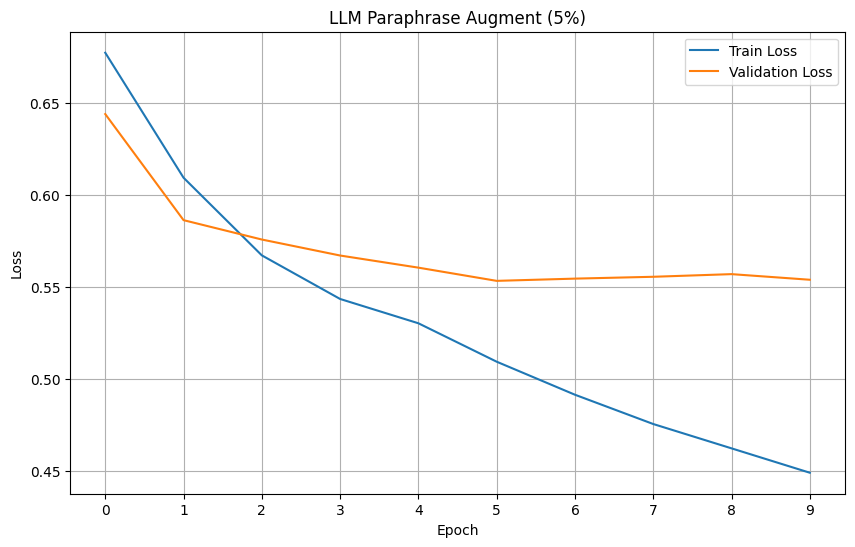

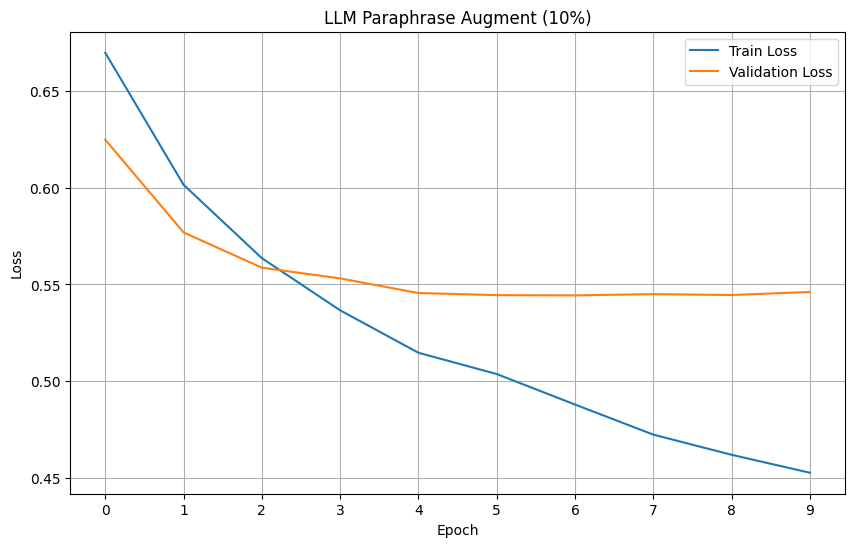

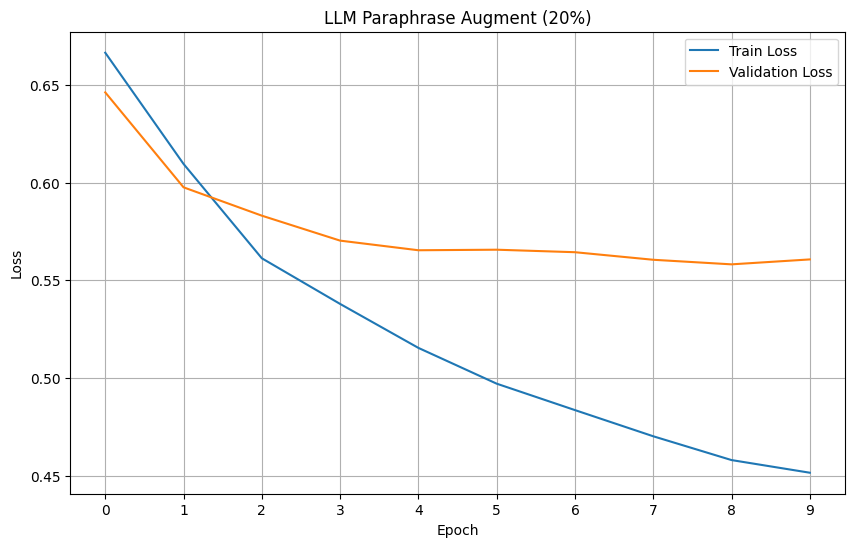

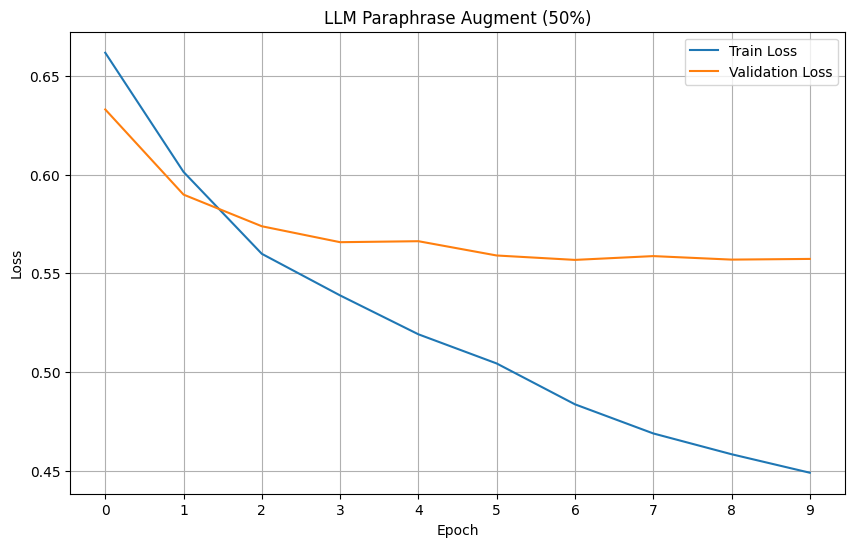

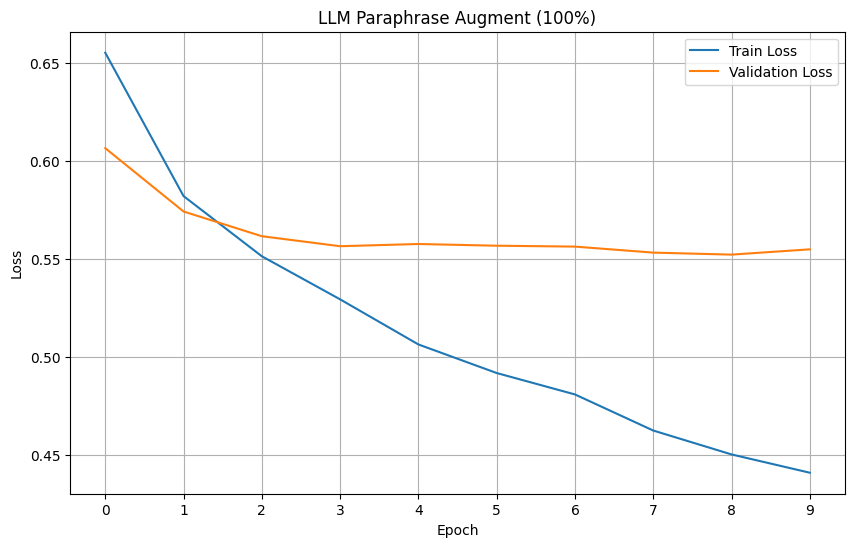

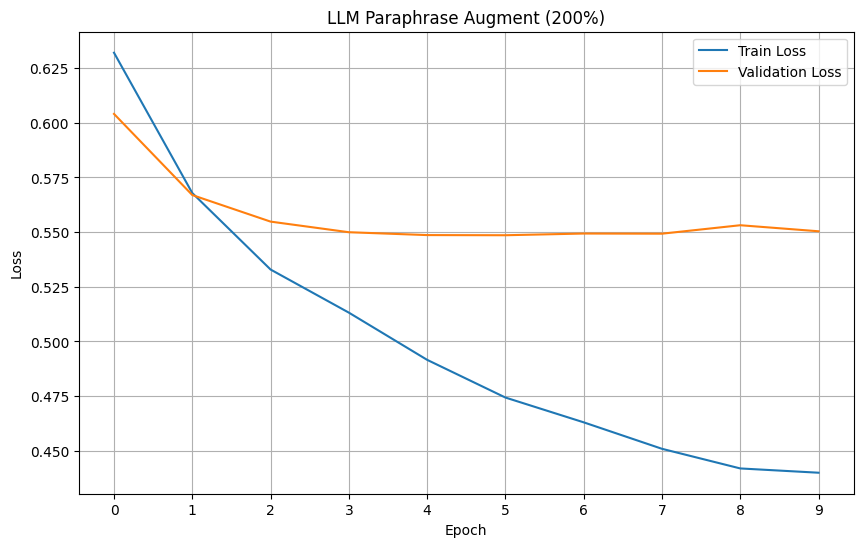

In [6]:
pipeline_summarizer_5.plot_loss(title="LLM Paraphrase Augment (5%)")
pipeline_summarizer_10.plot_loss(title="LLM Paraphrase Augment (10%)")
pipeline_summarizer_20.plot_loss(title="LLM Paraphrase Augment (20%)")
pipeline_summarizer_50.plot_loss(title="LLM Paraphrase Augment (50%)")
pipeline_summarizer_100.plot_loss(title="LLM Paraphrase Augment (100%)")
pipeline_summarizer_200.plot_loss(title="LLM Paraphrase Augment (200%)")

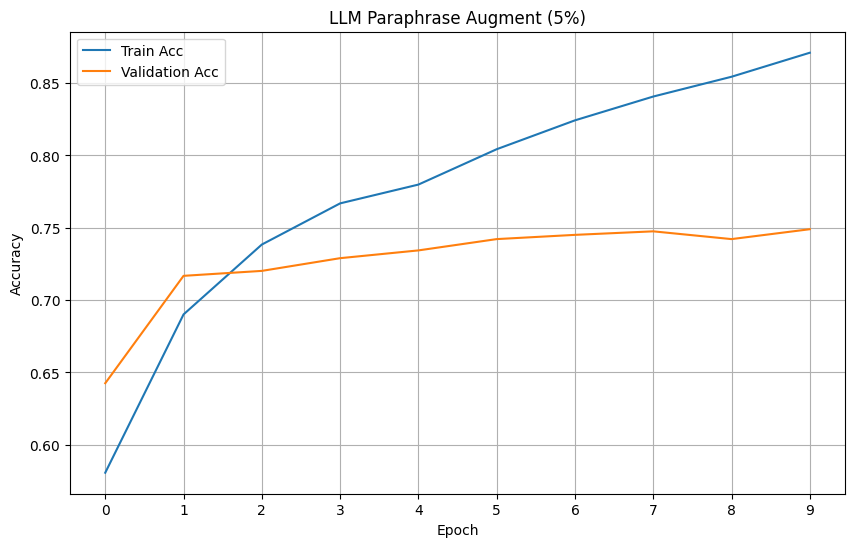

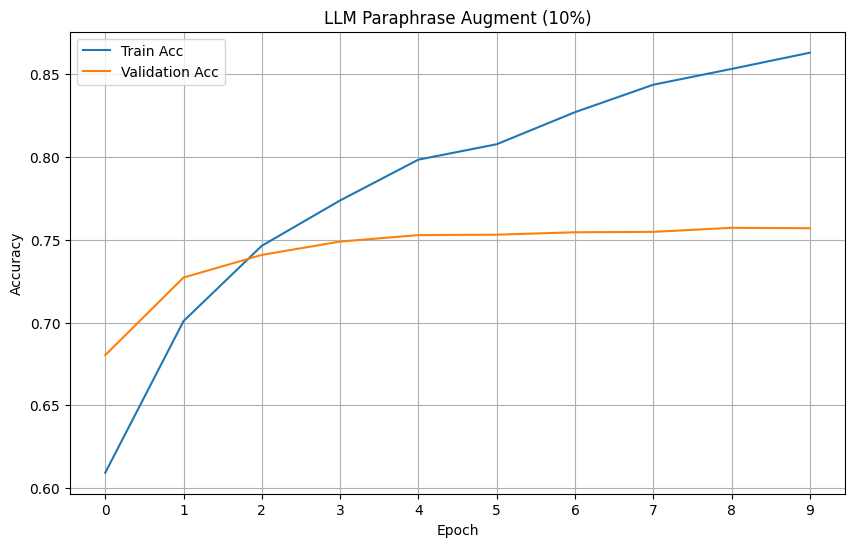

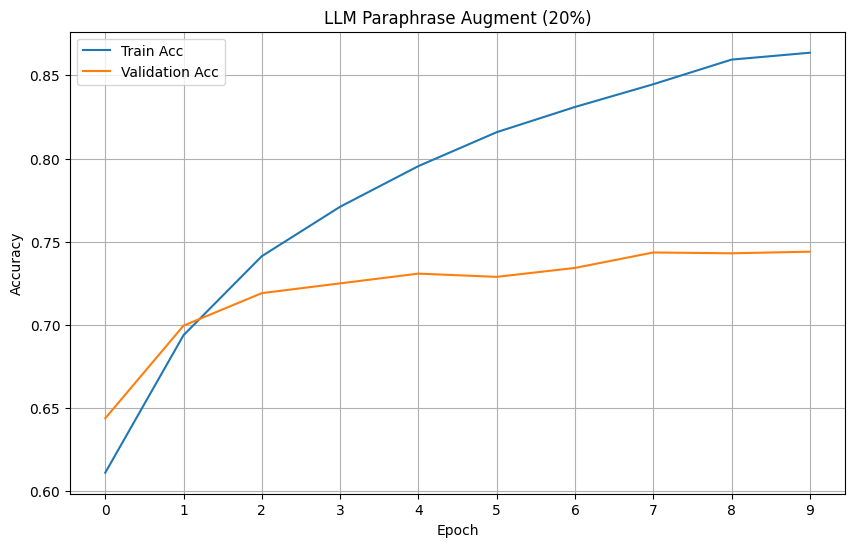

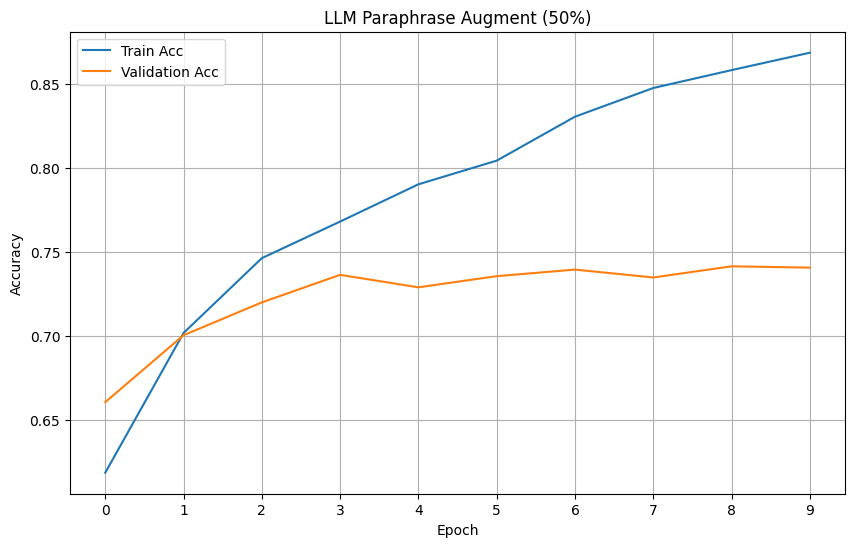

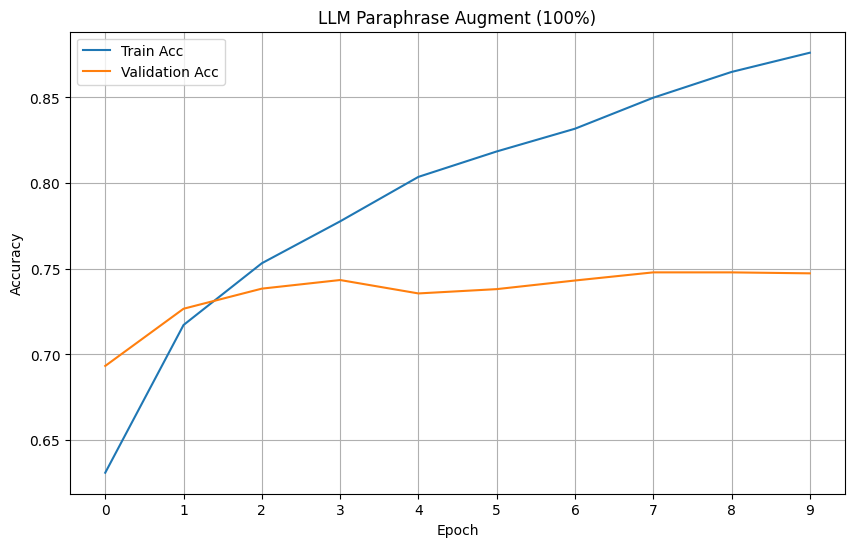

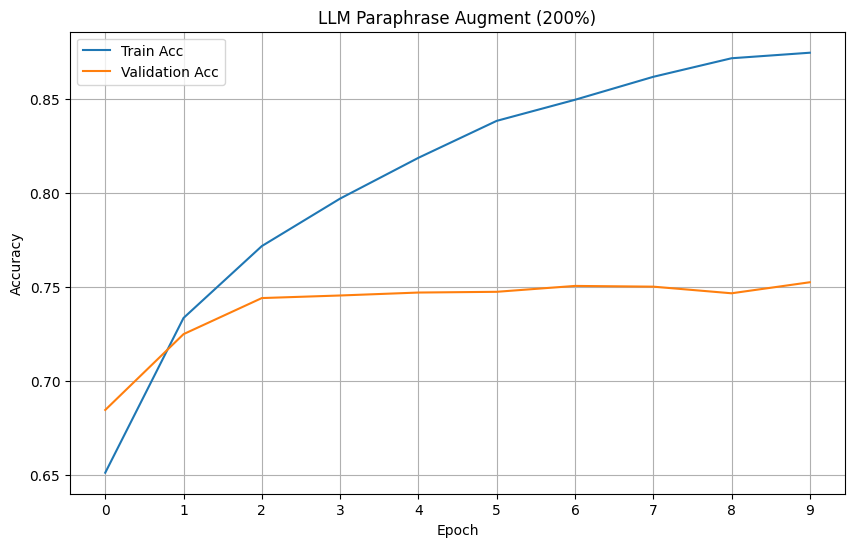

In [7]:
pipeline_summarizer_5.plot_acc(title="LLM Paraphrase Augment (5%)")
pipeline_summarizer_10.plot_acc(title="LLM Paraphrase Augment (10%)")
pipeline_summarizer_20.plot_acc(title="LLM Paraphrase Augment (20%)")
pipeline_summarizer_50.plot_acc(title="LLM Paraphrase Augment (50%)")
pipeline_summarizer_100.plot_acc(title="LLM Paraphrase Augment (100%)")
pipeline_summarizer_200.plot_acc(title="LLM Paraphrase Augment (200%)")

## Using the Augmented Datasets on LSTM Model

In [8]:
pipeline_summarizer_5_LSTM= TextClassificationPipeline(
    augmented_data=augmented_llm_summarizer_train_data_5, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)

pipeline_summarizer_10_LSTM= TextClassificationPipeline(
    augmented_data=augmented_llm_summarizer_train_data_10, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)

pipeline_summarizer_20_LSTM= TextClassificationPipeline(
    augmented_data=augmented_llm_summarizer_train_data_20, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)

pipeline_summarizer_50_LSTM= TextClassificationPipeline(
    augmented_data=augmented_llm_summarizer_train_data_50, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)

pipeline_summarizer_100_LSTM= TextClassificationPipeline(
    augmented_data=augmented_llm_summarizer_train_data_100, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)

pipeline_summarizer_200_LSTM= TextClassificationPipeline(
    augmented_data=augmented_llm_summarizer_train_data_200, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)

pipeline_summarizer_5_LSTM.train_model(n_epochs=10)
pipeline_summarizer_10_LSTM.train_model(n_epochs=10)
pipeline_summarizer_20_LSTM.train_model(n_epochs=10)
pipeline_summarizer_50_LSTM.train_model(n_epochs=10)
pipeline_summarizer_100_LSTM.train_model(n_epochs=10)
pipeline_summarizer_200_LSTM.train_model(n_epochs=10)

Map:   0%|          | 0/8956 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7164 [00:00<?, ? examples/s]

Map:   0%|          | 0/1792 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/9382 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7505 [00:00<?, ? examples/s]

Map:   0%|          | 0/1877 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10235 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/8188 [00:00<?, ? examples/s]

Map:   0%|          | 0/2047 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/12794 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10235 [00:00<?, ? examples/s]

Map:   0%|          | 0/2559 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/17058 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/13646 [00:00<?, ? examples/s]

Map:   0%|          | 0/3412 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/25586 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/20468 [00:00<?, ? examples/s]

Map:   0%|          | 0/5118 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]


Epoch: 1/10
Train Loss: 0.688, Train Acc: 0.536
Valid Loss: 0.658, Valid Acc: 0.678


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]


Epoch: 2/10
Train Loss: 0.614, Train Acc: 0.689
Valid Loss: 0.573, Valid Acc: 0.723


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]


Epoch: 3/10
Train Loss: 0.556, Train Acc: 0.741
Valid Loss: 0.560, Valid Acc: 0.741


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]


Epoch: 4/10
Train Loss: 0.530, Train Acc: 0.770
Valid Loss: 0.546, Valid Acc: 0.748


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.12it/s]


Epoch: 5/10
Train Loss: 0.514, Train Acc: 0.792
Valid Loss: 0.552, Valid Acc: 0.736


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.10it/s]


Epoch: 6/10
Train Loss: 0.496, Train Acc: 0.813
Valid Loss: 0.542, Valid Acc: 0.762


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]


Epoch: 7/10
Train Loss: 0.482, Train Acc: 0.825
Valid Loss: 0.551, Valid Acc: 0.750


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.11it/s]


Epoch: 8/10
Train Loss: 0.468, Train Acc: 0.844
Valid Loss: 0.553, Valid Acc: 0.754


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]


Epoch: 9/10
Train Loss: 0.483, Train Acc: 0.826
Valid Loss: 0.572, Valid Acc: 0.731


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]


Epoch: 10/10
Train Loss: 0.471, Train Acc: 0.839
Valid Loss: 0.547, Valid Acc: 0.757


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]


Epoch: 1/10
Train Loss: 0.687, Train Acc: 0.575
Valid Loss: 0.650, Valid Acc: 0.674


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]


Epoch: 2/10
Train Loss: 0.612, Train Acc: 0.686
Valid Loss: 0.576, Valid Acc: 0.720


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]


Epoch: 3/10
Train Loss: 0.561, Train Acc: 0.736
Valid Loss: 0.559, Valid Acc: 0.740


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]


Epoch: 4/10
Train Loss: 0.532, Train Acc: 0.768
Valid Loss: 0.551, Valid Acc: 0.750


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]


Epoch: 5/10
Train Loss: 0.513, Train Acc: 0.791
Valid Loss: 0.547, Valid Acc: 0.754


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]


Epoch: 6/10
Train Loss: 0.497, Train Acc: 0.811
Valid Loss: 0.538, Valid Acc: 0.760


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]


Epoch: 7/10
Train Loss: 0.486, Train Acc: 0.821
Valid Loss: 0.550, Valid Acc: 0.759


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]


Epoch: 8/10
Train Loss: 0.484, Train Acc: 0.822
Valid Loss: 0.544, Valid Acc: 0.763


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]


Epoch: 9/10
Train Loss: 0.469, Train Acc: 0.839
Valid Loss: 0.557, Valid Acc: 0.754


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]


Epoch: 10/10
Train Loss: 0.461, Train Acc: 0.849
Valid Loss: 0.561, Valid Acc: 0.745


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]


Epoch: 1/10
Train Loss: 0.682, Train Acc: 0.557
Valid Loss: 0.635, Valid Acc: 0.653


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]


Epoch: 2/10
Train Loss: 0.600, Train Acc: 0.696
Valid Loss: 0.591, Valid Acc: 0.690


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]


Epoch: 3/10
Train Loss: 0.551, Train Acc: 0.748
Valid Loss: 0.570, Valid Acc: 0.725


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]


Epoch: 4/10
Train Loss: 0.522, Train Acc: 0.780
Valid Loss: 0.570, Valid Acc: 0.728


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]


Epoch: 5/10
Train Loss: 0.501, Train Acc: 0.807
Valid Loss: 0.574, Valid Acc: 0.728


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]


Epoch: 6/10
Train Loss: 0.486, Train Acc: 0.821
Valid Loss: 0.566, Valid Acc: 0.732


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]


Epoch: 7/10
Train Loss: 0.474, Train Acc: 0.836
Valid Loss: 0.568, Valid Acc: 0.735


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]


Epoch: 8/10
Train Loss: 0.473, Train Acc: 0.838
Valid Loss: 0.579, Valid Acc: 0.728


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]


Epoch: 9/10
Train Loss: 0.486, Train Acc: 0.823
Valid Loss: 0.570, Valid Acc: 0.728


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]


Epoch: 10/10
Train Loss: 0.456, Train Acc: 0.856
Valid Loss: 0.566, Valid Acc: 0.743


evaluating...: 100%|██████████| 5/5 [00:01<00:00,  2.76it/s]


Epoch: 1/10
Train Loss: 0.671, Train Acc: 0.603
Valid Loss: 0.634, Valid Acc: 0.652


evaluating...: 100%|██████████| 5/5 [00:01<00:00,  2.64it/s]


Epoch: 2/10
Train Loss: 0.588, Train Acc: 0.705
Valid Loss: 0.572, Valid Acc: 0.725


evaluating...: 100%|██████████| 5/5 [00:01<00:00,  2.79it/s]


Epoch: 3/10
Train Loss: 0.546, Train Acc: 0.757
Valid Loss: 0.571, Valid Acc: 0.732


evaluating...: 100%|██████████| 5/5 [00:01<00:00,  2.78it/s]


Epoch: 4/10
Train Loss: 0.525, Train Acc: 0.779
Valid Loss: 0.560, Valid Acc: 0.739


evaluating...: 100%|██████████| 5/5 [00:01<00:00,  2.76it/s]


Epoch: 5/10
Train Loss: 0.507, Train Acc: 0.798
Valid Loss: 0.565, Valid Acc: 0.734


evaluating...: 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]


Epoch: 6/10
Train Loss: 0.503, Train Acc: 0.803
Valid Loss: 0.562, Valid Acc: 0.739


evaluating...: 100%|██████████| 5/5 [00:01<00:00,  2.68it/s]


Epoch: 7/10
Train Loss: 0.483, Train Acc: 0.825
Valid Loss: 0.561, Valid Acc: 0.741


evaluating...: 100%|██████████| 5/5 [00:01<00:00,  2.79it/s]


Epoch: 8/10
Train Loss: 0.470, Train Acc: 0.841
Valid Loss: 0.558, Valid Acc: 0.744


evaluating...: 100%|██████████| 5/5 [00:01<00:00,  2.74it/s]


Epoch: 9/10
Train Loss: 0.459, Train Acc: 0.853
Valid Loss: 0.562, Valid Acc: 0.738


evaluating...: 100%|██████████| 5/5 [00:01<00:00,  2.74it/s]


Epoch: 10/10
Train Loss: 0.455, Train Acc: 0.856
Valid Loss: 0.565, Valid Acc: 0.742


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]


Epoch: 1/10
Train Loss: 0.656, Train Acc: 0.618
Valid Loss: 0.610, Valid Acc: 0.671


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]


Epoch: 2/10
Train Loss: 0.569, Train Acc: 0.726
Valid Loss: 0.576, Valid Acc: 0.713


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]


Epoch: 3/10
Train Loss: 0.541, Train Acc: 0.758
Valid Loss: 0.568, Valid Acc: 0.717


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]


Epoch: 4/10
Train Loss: 0.519, Train Acc: 0.786
Valid Loss: 0.572, Valid Acc: 0.723


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]


Epoch: 5/10
Train Loss: 0.506, Train Acc: 0.799
Valid Loss: 0.572, Valid Acc: 0.728


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.94it/s]


Epoch: 6/10
Train Loss: 0.488, Train Acc: 0.819
Valid Loss: 0.576, Valid Acc: 0.718


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]


Epoch: 7/10
Train Loss: 0.479, Train Acc: 0.828
Valid Loss: 0.574, Valid Acc: 0.729


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.88it/s]


Epoch: 8/10
Train Loss: 0.476, Train Acc: 0.833
Valid Loss: 0.578, Valid Acc: 0.719


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]


Epoch: 9/10
Train Loss: 0.465, Train Acc: 0.844
Valid Loss: 0.573, Valid Acc: 0.731


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.92it/s]


Epoch: 10/10
Train Loss: 0.460, Train Acc: 0.851
Valid Loss: 0.582, Valid Acc: 0.725


evaluating...: 100%|██████████| 10/10 [00:03<00:00,  2.96it/s]


Epoch: 1/10
Train Loss: 0.640, Train Acc: 0.636
Valid Loss: 0.593, Valid Acc: 0.700


evaluating...: 100%|██████████| 10/10 [00:03<00:00,  2.96it/s]


Epoch: 2/10
Train Loss: 0.560, Train Acc: 0.737
Valid Loss: 0.559, Valid Acc: 0.740


evaluating...: 100%|██████████| 10/10 [00:03<00:00,  2.83it/s]


Epoch: 3/10
Train Loss: 0.530, Train Acc: 0.771
Valid Loss: 0.556, Valid Acc: 0.741


evaluating...: 100%|██████████| 10/10 [00:03<00:00,  2.98it/s]


Epoch: 4/10
Train Loss: 0.508, Train Acc: 0.797
Valid Loss: 0.549, Valid Acc: 0.751


evaluating...: 100%|██████████| 10/10 [00:03<00:00,  2.96it/s]


Epoch: 5/10
Train Loss: 0.486, Train Acc: 0.821
Valid Loss: 0.552, Valid Acc: 0.750


evaluating...: 100%|██████████| 10/10 [00:03<00:00,  2.91it/s]


Epoch: 6/10
Train Loss: 0.476, Train Acc: 0.832
Valid Loss: 0.548, Valid Acc: 0.753


evaluating...: 100%|██████████| 10/10 [00:03<00:00,  3.01it/s]


Epoch: 7/10
Train Loss: 0.467, Train Acc: 0.842
Valid Loss: 0.556, Valid Acc: 0.747


evaluating...: 100%|██████████| 10/10 [00:03<00:00,  3.04it/s]


Epoch: 8/10
Train Loss: 0.457, Train Acc: 0.853
Valid Loss: 0.554, Valid Acc: 0.755


evaluating...: 100%|██████████| 10/10 [00:03<00:00,  3.04it/s]


Epoch: 9/10
Train Loss: 0.449, Train Acc: 0.862
Valid Loss: 0.547, Valid Acc: 0.759


evaluating...: 100%|██████████| 10/10 [00:03<00:00,  3.04it/s]

Epoch: 10/10
Train Loss: 0.444, Train Acc: 0.867
Valid Loss: 0.547, Valid Acc: 0.759


## Performance of LSTM

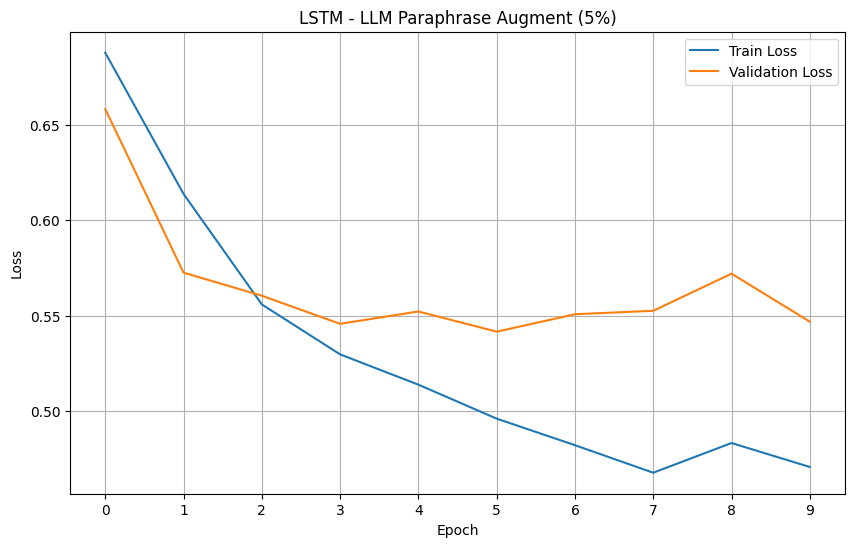

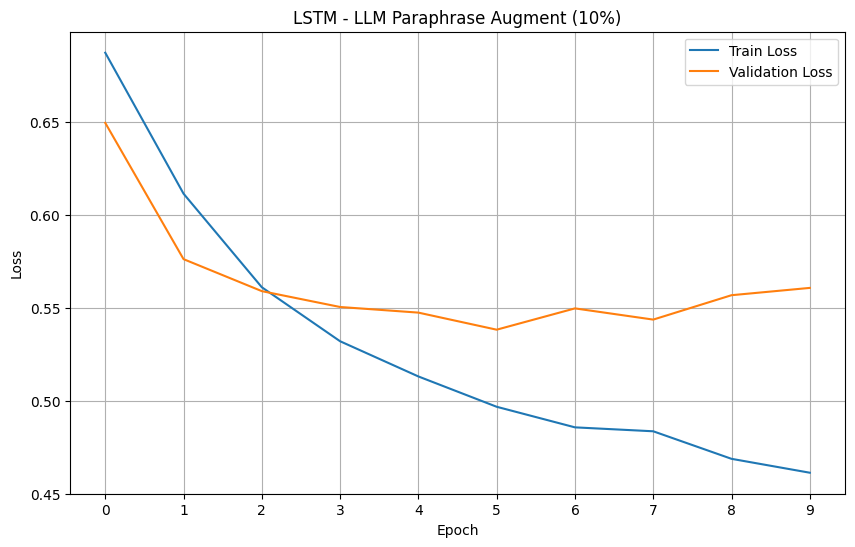

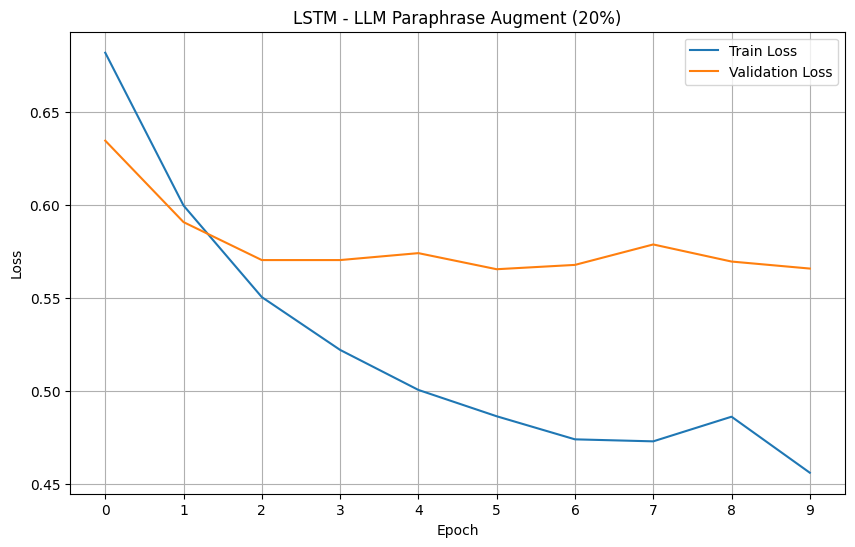

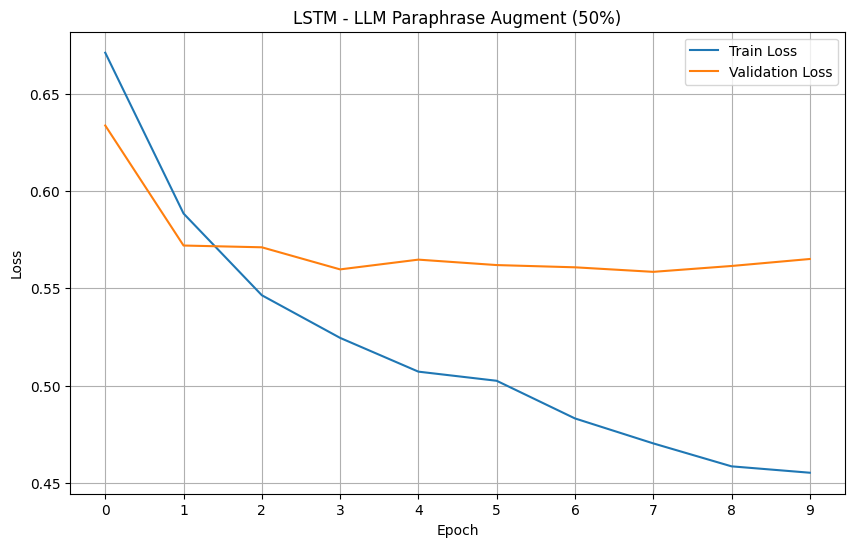

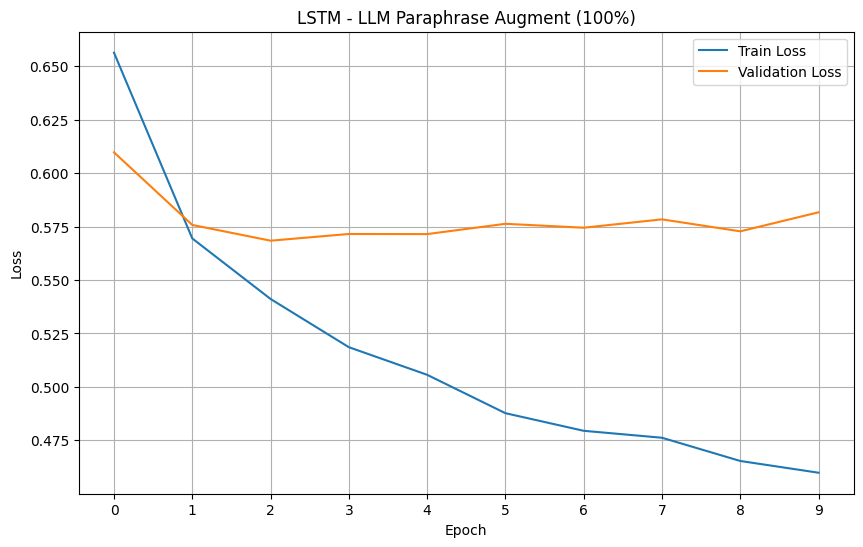

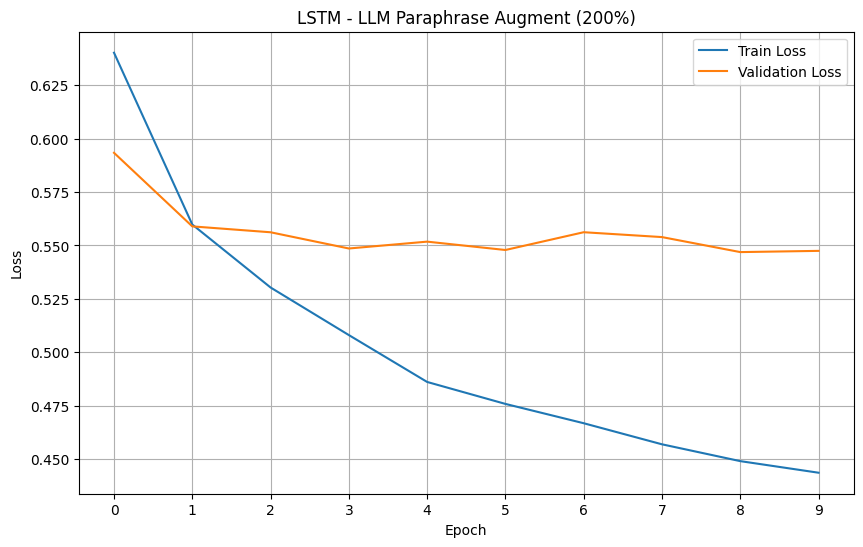

In [9]:
pipeline_summarizer_5_LSTM.plot_loss(title="LSTM - LLM Paraphrase Augment (5%)")
pipeline_summarizer_10_LSTM.plot_loss(title="LSTM - LLM Paraphrase Augment (10%)")
pipeline_summarizer_20_LSTM.plot_loss(title="LSTM - LLM Paraphrase Augment (20%)")
pipeline_summarizer_50_LSTM.plot_loss(title="LSTM - LLM Paraphrase Augment (50%)")
pipeline_summarizer_100_LSTM.plot_loss(title="LSTM - LLM Paraphrase Augment (100%)")
pipeline_summarizer_200_LSTM.plot_loss(title="LSTM - LLM Paraphrase Augment (200%)")

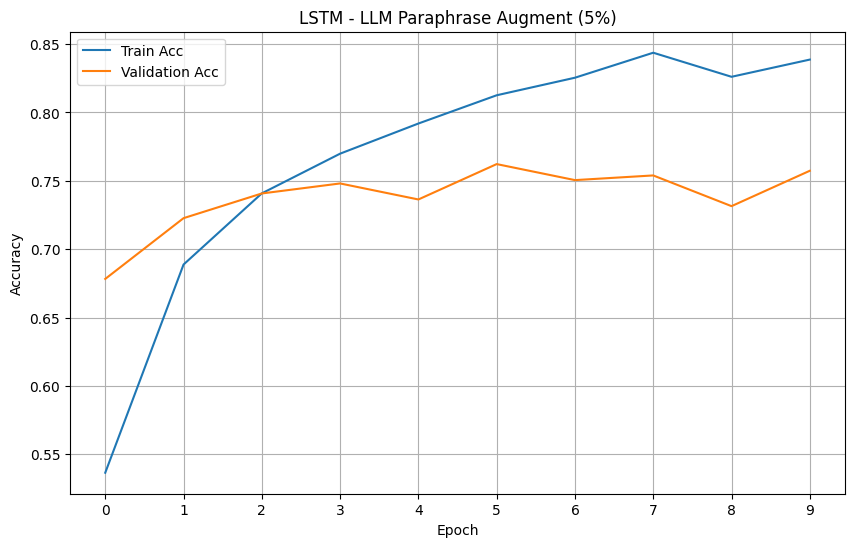

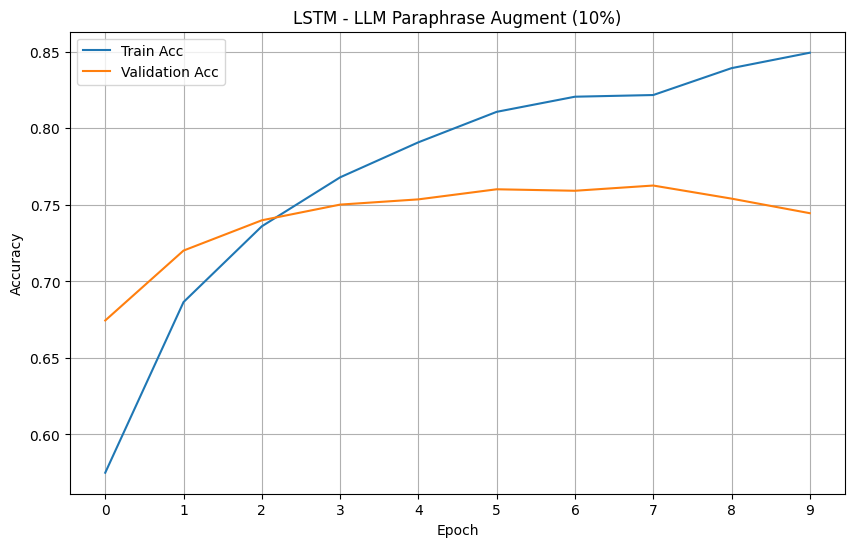

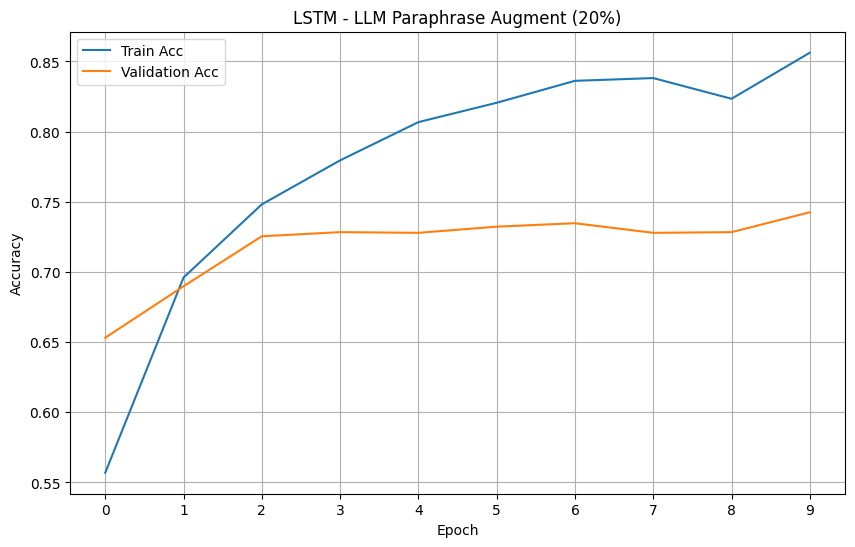

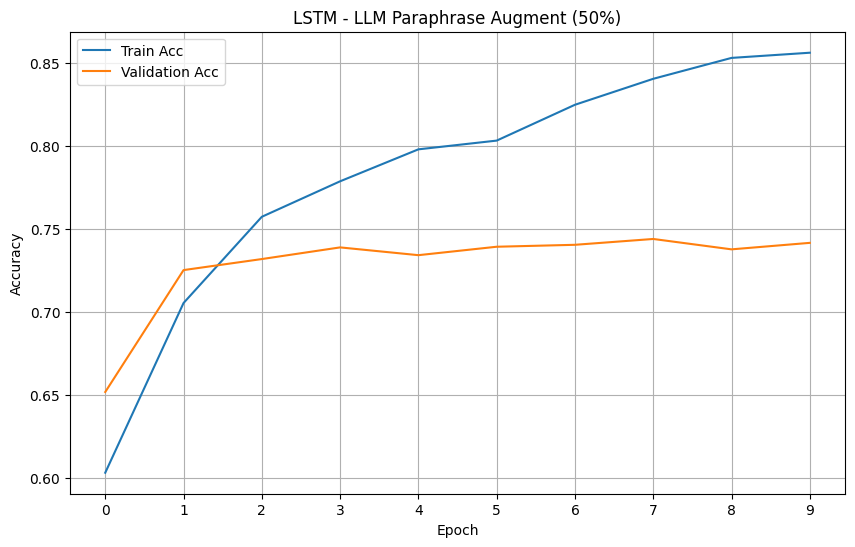

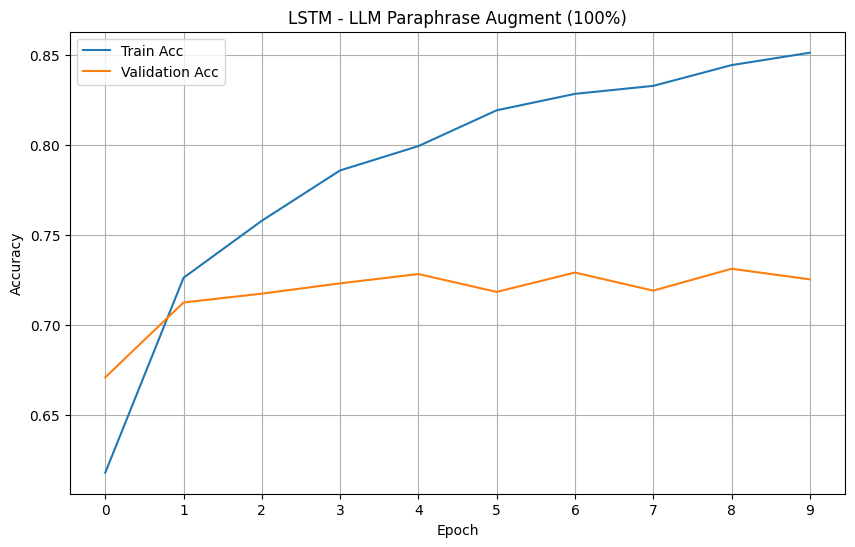

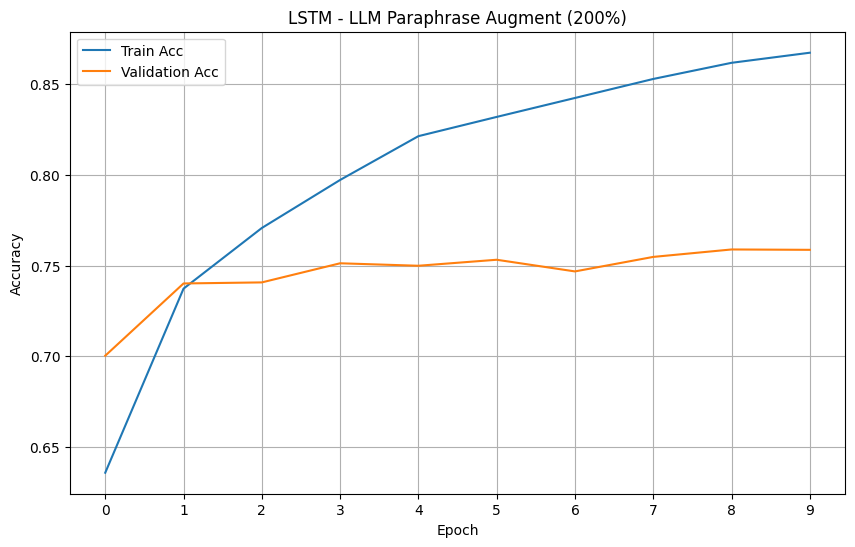

In [10]:
pipeline_summarizer_5_LSTM.plot_acc(title="LSTM - LLM Paraphrase Augment (5%)")
pipeline_summarizer_10_LSTM.plot_acc(title="LSTM - LLM Paraphrase Augment (10%)")
pipeline_summarizer_20_LSTM.plot_acc(title="LSTM - LLM Paraphrase Augment (20%)")
pipeline_summarizer_50_LSTM.plot_acc(title="LSTM - LLM Paraphrase Augment (50%)")
pipeline_summarizer_100_LSTM.plot_acc(title="LSTM - LLM Paraphrase Augment (100%)")
pipeline_summarizer_200_LSTM.plot_acc(title="LSTM - LLM Paraphrase Augment (200%)")

____

# Performance of LLM Summarize Augmented Dataset

## Augment Data set with 5%, 10%, 20%, 50%, 100%, 200% LLM Summarize

Augmented datapoints are concatenated into the original dataset to increase the size by 5%, 10%, 20%, 50%, 100%, 200% respectively.

In [ ]:
# Augment by 5%, 10%, 20%, 50%, 100%, 200%
percentage= {
    MODE.LLM.SUMMARIZE: 0.05,
}
augmented_llm_summarizer_5 = augment_data(original_train_data, percentage)
percentage= {
    MODE.LLM.SUMMARIZE: 0.10,
}
augmented_llm_summarizer_10 = augment_data(original_train_data, percentage)
percentage= {
    MODE.LLM.SUMMARIZE: 0.20,
}
augmented_llm_summarizer_20 = augment_data(original_train_data, percentage)
percentage= {
    MODE.LLM.SUMMARIZE: 0.50,
}
augmented_llm_summarizer_50 = augment_data(original_train_data, percentage)
percentage= {
    MODE.LLM.SUMMARIZE: 1.00,
}
augmented_llm_summarizer_100 = augment_data(original_train_data, percentage)
percentage= {
    MODE.LLM.SUMMARIZE: 2.00,
}
augmented_llm_summarizer_200 = augment_data(original_train_data, percentage)

# Convert augmented data into Datasets
augmented_llm_summarizer_5_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_llm_summarizer_5],
    "label": [item["label"] for item in augmented_llm_summarizer_5]
}, features=features)

augmented_llm_summarizer_10_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_llm_summarizer_10],
    "label": [item["label"] for item in augmented_llm_summarizer_10]
}, features=features)

augmented_llm_summarizer_20_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_llm_summarizer_20],
    "label": [item["label"] for item in augmented_llm_summarizer_20]
}, features=features)

augmented_llm_summarizer_50_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_llm_summarizer_50],
    "label": [item["label"] for item in augmented_llm_summarizer_20]
}, features=features)

augmented_llm_summarizer_100_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_llm_summarizer_100],
    "label": [item["label"] for item in augmented_llm_summarizer_100]
}, features=features)

augmented_llm_summarizer_200_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_llm_summarizer_200],
    "label": [item["label"] for item in augmented_llm_summarizer_200]
}, features=features)

# Concatenate original and augmented datasets
augmented_llm_summarizer_train_data_5 = concatenate_datasets([original_train_data, augmented_llm_summarizer_5_dataset])
augmented_llm_summarizer_train_data_10 = concatenate_datasets([original_train_data, augmented_llm_summarizer_10_dataset])
augmented_llm_summarizer_train_data_20 = concatenate_datasets([original_train_data, augmented_llm_summarizer_20_dataset])
augmented_llm_summarizer_train_data_50 = concatenate_datasets([original_train_data, augmented_llm_summarizer_50_dataset])
augmented_llm_summarizer_train_data_100 = concatenate_datasets([original_train_data, augmented_llm_summarizer_100_dataset])
augmented_llm_summarizer_train_data_200 = concatenate_datasets([original_train_data, augmented_llm_summarizer_200_dataset])

print(f"Original train size: {len(original_train_data)}")
print(f"Train size after 5% summarizer augmentation: {len(augmented_llm_summarizer_train_data_5)}")
print(f"Train size after 10% summarizer augmentation: {len(augmented_llm_summarizer_train_data_10)}")
print(f"Train size after 20% summarizer augmentation: {len(augmented_llm_summarizer_train_data_20)}")
print(f"Train size after 50% summarizer augmentation: {len(augmented_llm_summarizer_train_data_50)}")
print(f"Train size after 100% summarizer augmentation: {len(augmented_llm_summarizer_train_data_100)}")
print(f"Train size after 200% summarizer augmentation: {len(augmented_llm_summarizer_train_data_200)}")

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

c:\Users\dexter\AppData\Local\pypoetry\Cache\virtualenvs\nlarge-egHm7VgB-py3.12\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\dexter\.cache\huggingface\hub\models--facebook--bart-large-cnn. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Your max_length is set to 100, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)
Your max_length is set to 100, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)
Your max_length is set to 100, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 100, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)
Your

KeyboardInterrupt: 

Takes too much compute to augment the dataset, we have exported and load the augmented datasets

In [11]:
from datasets import load_from_disk

path_to_datasets = "C:\\Users\\dexter\\Documents\\NN Group Assignment\\SC4001\\example\\llm-datasets\\"

augmented_llm_summarizer_train_data_5 = load_from_disk(path_to_datasets+"augmented_llm_summarizer2_train_data_5")
augmented_llm_summarizer_train_data_10 = load_from_disk(path_to_datasets+"augmented_llm_summarizer2_train_data_10")
augmented_llm_summarizer_train_data_20 = load_from_disk(path_to_datasets+"augmented_llm_summarizer2_train_data_20")
augmented_llm_summarizer_train_data_50 = load_from_disk(path_to_datasets+"augmented_llm_summarizer2_train_data_50")
augmented_llm_summarizer_train_data_100 = load_from_disk(path_to_datasets+"augmented_llm_summarizer2_train_data_100")
augmented_llm_summarizer_train_data_200 = load_from_disk(path_to_datasets+"augmented_llm_summarizer2_train_data_200")

print(f"Original train size: {len(original_train_data)}")
print(f"Train size after 5% summarizer augmentation: {len(augmented_llm_summarizer_train_data_5)}")
print(f"Train size after 10% summarizer augmentation: {len(augmented_llm_summarizer_train_data_10)}")
print(f"Train size after 20% summarizer augmentation: {len(augmented_llm_summarizer_train_data_20)}")
print(f"Train size after 50% summarizer augmentation: {len(augmented_llm_summarizer_train_data_50)}")
print(f"Train size after 100% summarizer augmentation: {len(augmented_llm_summarizer_train_data_100)}")
print(f"Train size after 200% summarizer augmentation: {len(augmented_llm_summarizer_train_data_200)}")

Original train size: 8530
Train size after 5% summarizer augmentation: 8956
Train size after 10% summarizer augmentation: 9382
Train size after 20% summarizer augmentation: 10235
Train size after 50% summarizer augmentation: 12794
Train size after 100% summarizer augmentation: 17058
Train size after 200% summarizer augmentation: 25586


## Using the Augmented Datasets on the Same RNN Text Classifier Pipeline

In [12]:
pipeline_summarizer_5= TextClassificationPipeline(
    augmented_data=augmented_llm_summarizer_train_data_5, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)

pipeline_summarizer_10= TextClassificationPipeline(
    augmented_data=augmented_llm_summarizer_train_data_10, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)

pipeline_summarizer_20= TextClassificationPipeline(
    augmented_data=augmented_llm_summarizer_train_data_20, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)

pipeline_summarizer_50= TextClassificationPipeline(
    augmented_data=augmented_llm_summarizer_train_data_50, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)

pipeline_summarizer_100= TextClassificationPipeline(
    augmented_data=augmented_llm_summarizer_train_data_100, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)

pipeline_summarizer_200= TextClassificationPipeline(
    augmented_data=augmented_llm_summarizer_train_data_200, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)

Map:   0%|          | 0/8956 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7164 [00:00<?, ? examples/s]

Map:   0%|          | 0/1792 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/9382 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7505 [00:00<?, ? examples/s]

Map:   0%|          | 0/1877 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10235 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/8188 [00:00<?, ? examples/s]

Map:   0%|          | 0/2047 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/12794 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10235 [00:00<?, ? examples/s]

Map:   0%|          | 0/2559 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/17058 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/13646 [00:00<?, ? examples/s]

Map:   0%|          | 0/3412 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/25586 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/20468 [00:00<?, ? examples/s]

Map:   0%|          | 0/5118 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

## Model Training

In [13]:
pipeline_summarizer_5.train_model(n_epochs=10)
pipeline_summarizer_10.train_model(n_epochs=10)
pipeline_summarizer_20.train_model(n_epochs=10)
pipeline_summarizer_50.train_model(n_epochs=10)
pipeline_summarizer_100.train_model(n_epochs=10)
pipeline_summarizer_200.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.15it/s]


Epoch: 1/10
Train Loss: 0.676, Train Acc: 0.591
Valid Loss: 0.643, Valid Acc: 0.633


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.61it/s]


Epoch: 2/10
Train Loss: 0.602, Train Acc: 0.702
Valid Loss: 0.579, Valid Acc: 0.723


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.26it/s]


Epoch: 3/10
Train Loss: 0.556, Train Acc: 0.751
Valid Loss: 0.562, Valid Acc: 0.733


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.51it/s]


Epoch: 4/10
Train Loss: 0.528, Train Acc: 0.785
Valid Loss: 0.555, Valid Acc: 0.750


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.08it/s]


Epoch: 5/10
Train Loss: 0.514, Train Acc: 0.798
Valid Loss: 0.555, Valid Acc: 0.737


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.48it/s]


Epoch: 6/10
Train Loss: 0.498, Train Acc: 0.815
Valid Loss: 0.542, Valid Acc: 0.756


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.34it/s]


Epoch: 7/10
Train Loss: 0.481, Train Acc: 0.836
Valid Loss: 0.548, Valid Acc: 0.747


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.51it/s]


Epoch: 8/10
Train Loss: 0.464, Train Acc: 0.852
Valid Loss: 0.548, Valid Acc: 0.750


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.53it/s]


Epoch: 9/10
Train Loss: 0.454, Train Acc: 0.861
Valid Loss: 0.547, Valid Acc: 0.756


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.22it/s]


Epoch: 10/10
Train Loss: 0.447, Train Acc: 0.868
Valid Loss: 0.550, Valid Acc: 0.755


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.86it/s]


Epoch: 1/10
Train Loss: 0.663, Train Acc: 0.624
Valid Loss: 0.621, Valid Acc: 0.677


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.01it/s]


Epoch: 2/10
Train Loss: 0.587, Train Acc: 0.719
Valid Loss: 0.578, Valid Acc: 0.724


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.14it/s]


Epoch: 3/10
Train Loss: 0.546, Train Acc: 0.761
Valid Loss: 0.561, Valid Acc: 0.745


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.08it/s]


Epoch: 4/10
Train Loss: 0.522, Train Acc: 0.793
Valid Loss: 0.557, Valid Acc: 0.746


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.75it/s]


Epoch: 5/10
Train Loss: 0.500, Train Acc: 0.813
Valid Loss: 0.547, Valid Acc: 0.759


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.51it/s]


Epoch: 6/10
Train Loss: 0.482, Train Acc: 0.835
Valid Loss: 0.549, Valid Acc: 0.755


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.97it/s]


Epoch: 7/10
Train Loss: 0.469, Train Acc: 0.847
Valid Loss: 0.552, Valid Acc: 0.758


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.21it/s]


Epoch: 8/10
Train Loss: 0.455, Train Acc: 0.860
Valid Loss: 0.550, Valid Acc: 0.759


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.05it/s]


Epoch: 9/10
Train Loss: 0.449, Train Acc: 0.868
Valid Loss: 0.541, Valid Acc: 0.762


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.09it/s]


Epoch: 10/10
Train Loss: 0.439, Train Acc: 0.882
Valid Loss: 0.546, Valid Acc: 0.750


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.23it/s]


Epoch: 1/10
Train Loss: 0.660, Train Acc: 0.640
Valid Loss: 0.600, Valid Acc: 0.707


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.35it/s]


Epoch: 2/10
Train Loss: 0.592, Train Acc: 0.716
Valid Loss: 0.570, Valid Acc: 0.734


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  6.85it/s]


Epoch: 3/10
Train Loss: 0.548, Train Acc: 0.759
Valid Loss: 0.550, Valid Acc: 0.761


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.31it/s]


Epoch: 4/10
Train Loss: 0.523, Train Acc: 0.791
Valid Loss: 0.537, Valid Acc: 0.773


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.30it/s]


Epoch: 5/10
Train Loss: 0.504, Train Acc: 0.809
Valid Loss: 0.549, Valid Acc: 0.750


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.05it/s]


Epoch: 6/10
Train Loss: 0.488, Train Acc: 0.825
Valid Loss: 0.525, Valid Acc: 0.780


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  6.88it/s]


Epoch: 7/10
Train Loss: 0.468, Train Acc: 0.847
Valid Loss: 0.524, Valid Acc: 0.780


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.19it/s]


Epoch: 8/10
Train Loss: 0.459, Train Acc: 0.858
Valid Loss: 0.529, Valid Acc: 0.774


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.07it/s]


Epoch: 9/10
Train Loss: 0.442, Train Acc: 0.876
Valid Loss: 0.521, Valid Acc: 0.787


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  5.87it/s]


Epoch: 10/10
Train Loss: 0.432, Train Acc: 0.886
Valid Loss: 0.518, Valid Acc: 0.791


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.01it/s]


Epoch: 1/10
Train Loss: 0.654, Train Acc: 0.633
Valid Loss: 0.594, Valid Acc: 0.714


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.71it/s]


Epoch: 2/10
Train Loss: 0.569, Train Acc: 0.745
Valid Loss: 0.569, Valid Acc: 0.739


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.63it/s]


Epoch: 3/10
Train Loss: 0.531, Train Acc: 0.781
Valid Loss: 0.538, Valid Acc: 0.770


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.09it/s]


Epoch: 4/10
Train Loss: 0.504, Train Acc: 0.807
Valid Loss: 0.534, Valid Acc: 0.773


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.73it/s]


Epoch: 5/10
Train Loss: 0.481, Train Acc: 0.833
Valid Loss: 0.515, Valid Acc: 0.791


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.74it/s]


Epoch: 6/10
Train Loss: 0.457, Train Acc: 0.859
Valid Loss: 0.507, Valid Acc: 0.800


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.76it/s]


Epoch: 7/10
Train Loss: 0.440, Train Acc: 0.879
Valid Loss: 0.501, Valid Acc: 0.804


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.84it/s]


Epoch: 8/10
Train Loss: 0.431, Train Acc: 0.886
Valid Loss: 0.495, Valid Acc: 0.816


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.58it/s]


Epoch: 9/10
Train Loss: 0.418, Train Acc: 0.899
Valid Loss: 0.498, Valid Acc: 0.813


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.87it/s]


Epoch: 10/10
Train Loss: 0.409, Train Acc: 0.909
Valid Loss: 0.492, Valid Acc: 0.817


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.75it/s]


Epoch: 1/10
Train Loss: 0.642, Train Acc: 0.656
Valid Loss: 0.571, Valid Acc: 0.736


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.83it/s]


Epoch: 2/10
Train Loss: 0.559, Train Acc: 0.750
Valid Loss: 0.536, Valid Acc: 0.769


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.79it/s]


Epoch: 3/10
Train Loss: 0.519, Train Acc: 0.791
Valid Loss: 0.515, Valid Acc: 0.791


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.57it/s]


Epoch: 4/10
Train Loss: 0.489, Train Acc: 0.823
Valid Loss: 0.517, Valid Acc: 0.789


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.79it/s]


Epoch: 5/10
Train Loss: 0.467, Train Acc: 0.847
Valid Loss: 0.493, Valid Acc: 0.815


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.62it/s]


Epoch: 6/10
Train Loss: 0.442, Train Acc: 0.875
Valid Loss: 0.480, Valid Acc: 0.825


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.90it/s]


Epoch: 7/10
Train Loss: 0.425, Train Acc: 0.892
Valid Loss: 0.474, Valid Acc: 0.836


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  5.95it/s]


Epoch: 8/10
Train Loss: 0.412, Train Acc: 0.905
Valid Loss: 0.470, Valid Acc: 0.841


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.01it/s]


Epoch: 9/10
Train Loss: 0.409, Train Acc: 0.907
Valid Loss: 0.461, Valid Acc: 0.851


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.80it/s]


Epoch: 10/10
Train Loss: 0.399, Train Acc: 0.918
Valid Loss: 0.473, Valid Acc: 0.835


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.88it/s]


Epoch: 1/10
Train Loss: 0.617, Train Acc: 0.680
Valid Loss: 0.551, Valid Acc: 0.754


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  6.14it/s]


Epoch: 2/10
Train Loss: 0.520, Train Acc: 0.791
Valid Loss: 0.524, Valid Acc: 0.781


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  6.27it/s]


Epoch: 3/10
Train Loss: 0.478, Train Acc: 0.833
Valid Loss: 0.486, Valid Acc: 0.822


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  6.15it/s]


Epoch: 4/10
Train Loss: 0.437, Train Acc: 0.879
Valid Loss: 0.459, Valid Acc: 0.851


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.84it/s]


Epoch: 5/10
Train Loss: 0.411, Train Acc: 0.904
Valid Loss: 0.439, Valid Acc: 0.872


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  6.34it/s]


Epoch: 6/10
Train Loss: 0.396, Train Acc: 0.920
Valid Loss: 0.425, Valid Acc: 0.889


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.99it/s]


Epoch: 7/10
Train Loss: 0.388, Train Acc: 0.928
Valid Loss: 0.417, Valid Acc: 0.895


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.74it/s]


Epoch: 8/10
Train Loss: 0.378, Train Acc: 0.938
Valid Loss: 0.416, Valid Acc: 0.897


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  6.34it/s]


Epoch: 9/10
Train Loss: 0.373, Train Acc: 0.942
Valid Loss: 0.407, Valid Acc: 0.906


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  6.07it/s]

Epoch: 10/10
Train Loss: 0.369, Train Acc: 0.945
Valid Loss: 0.408, Valid Acc: 0.904


## Performance of Augmented Datasets

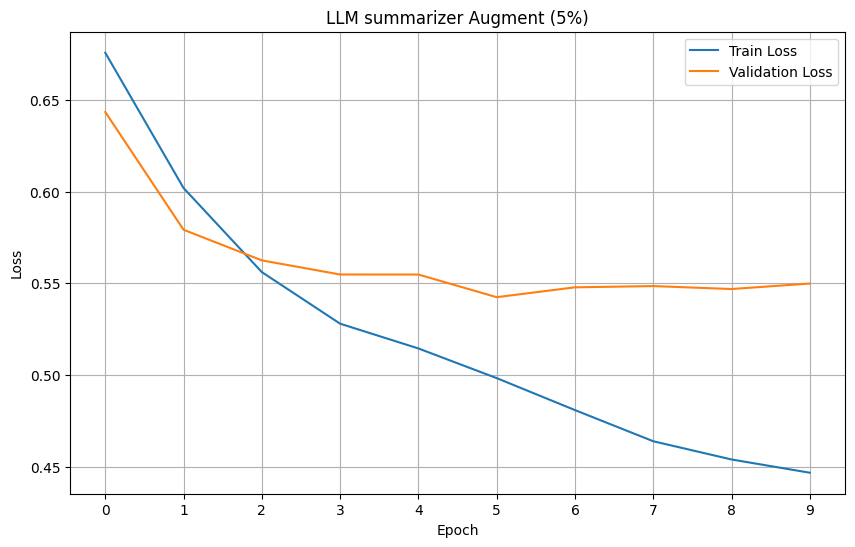

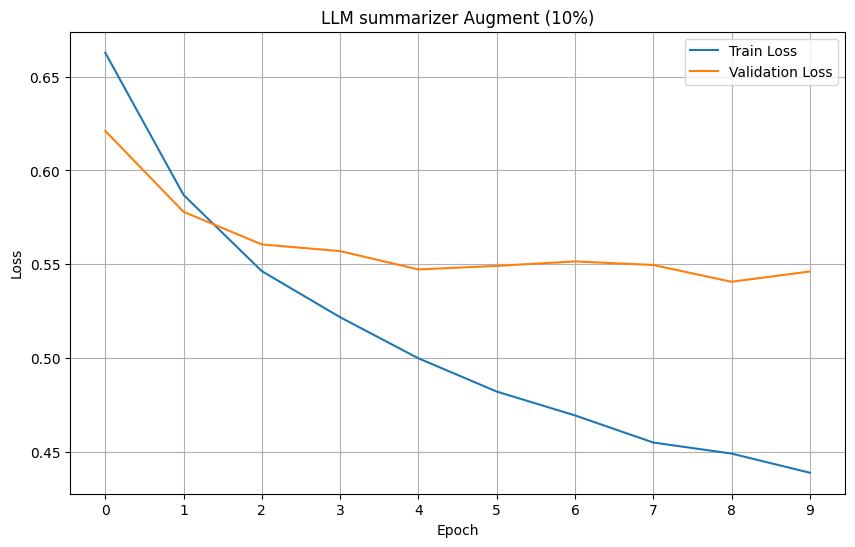

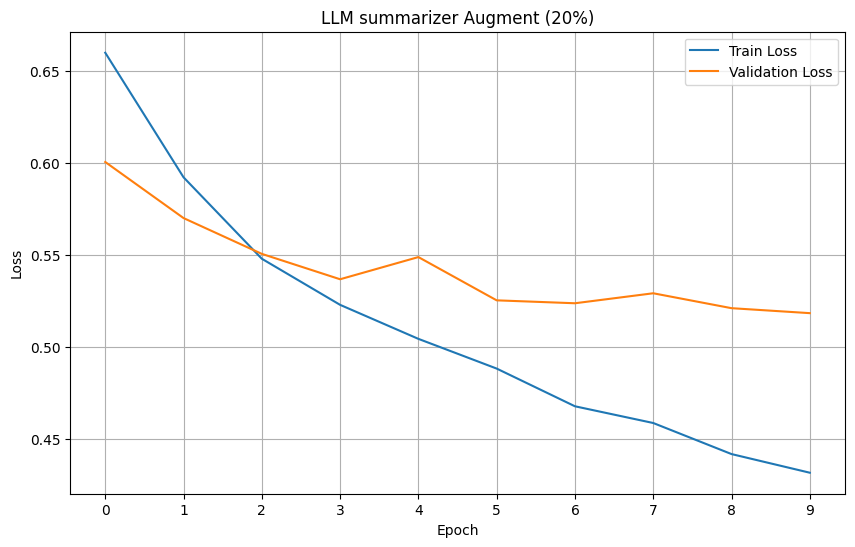

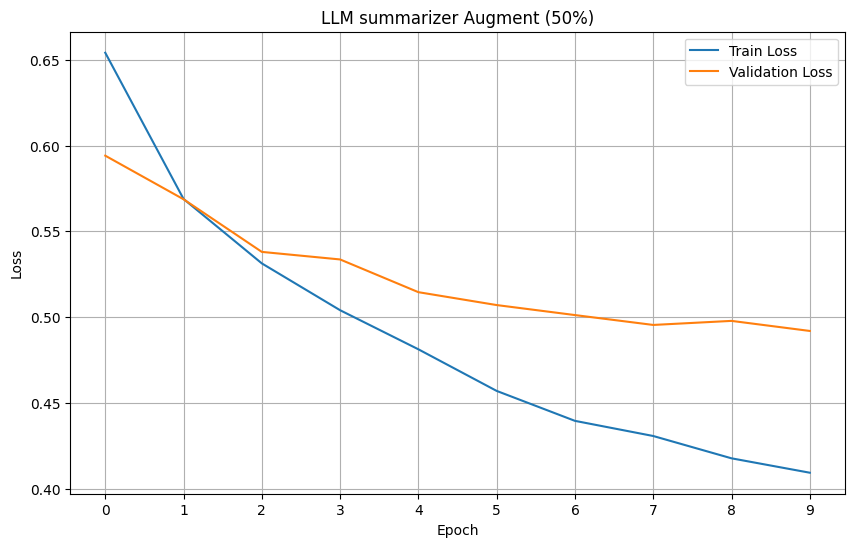

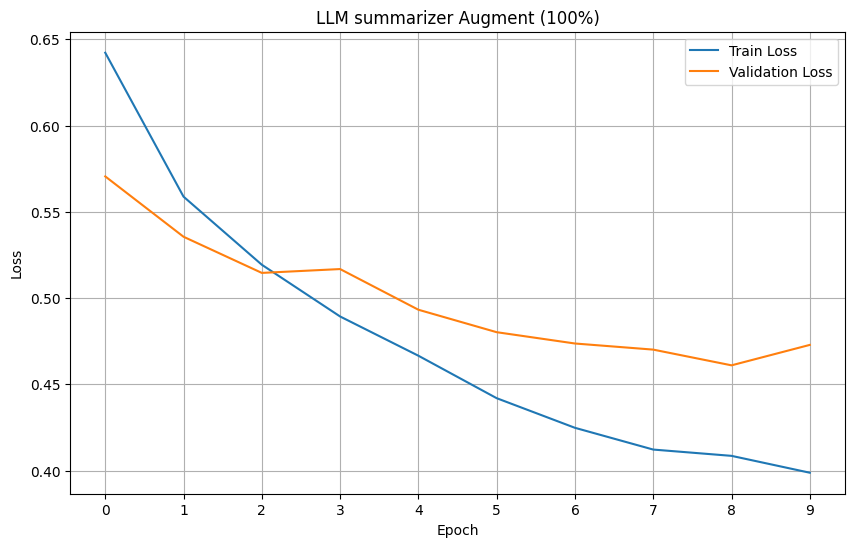

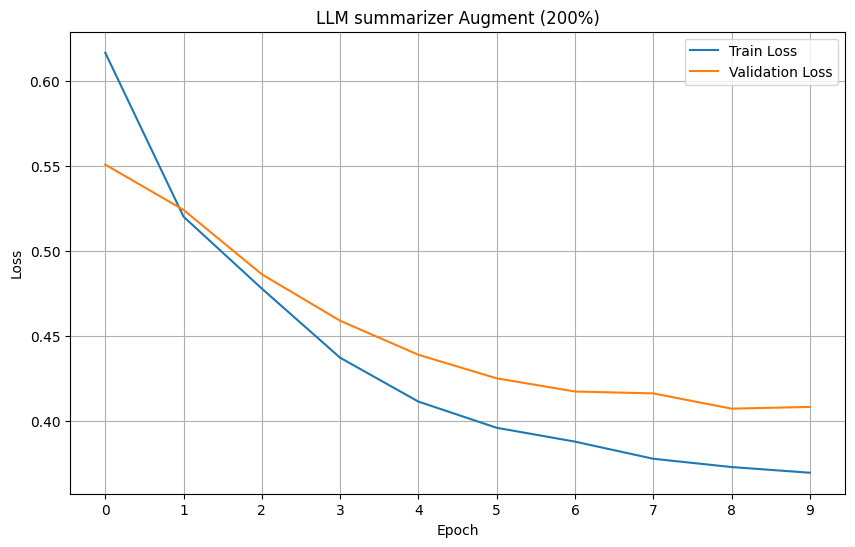

In [14]:
pipeline_summarizer_5.plot_loss(title="LLM summarizer Augment (5%)")
pipeline_summarizer_10.plot_loss(title="LLM summarizer Augment (10%)")
pipeline_summarizer_20.plot_loss(title="LLM summarizer Augment (20%)")
pipeline_summarizer_50.plot_loss(title="LLM summarizer Augment (50%)")
pipeline_summarizer_100.plot_loss(title="LLM summarizer Augment (100%)")
pipeline_summarizer_200.plot_loss(title="LLM summarizer Augment (200%)")

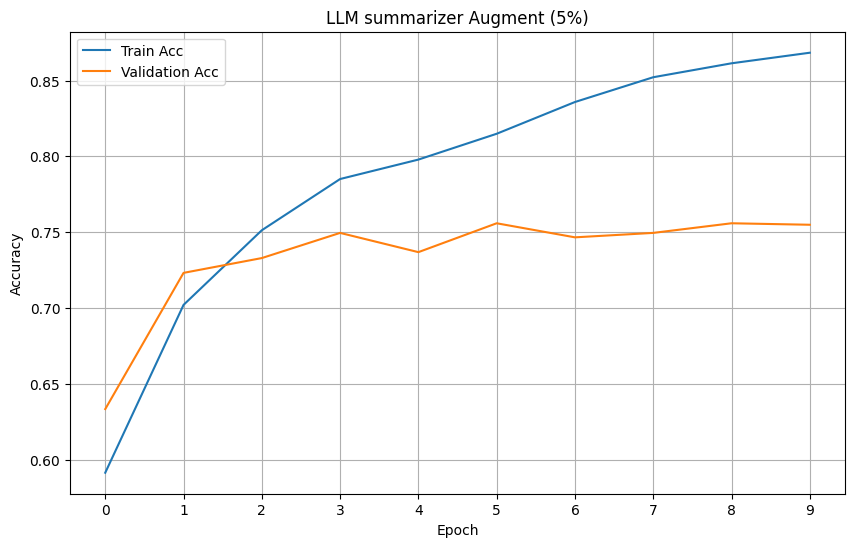

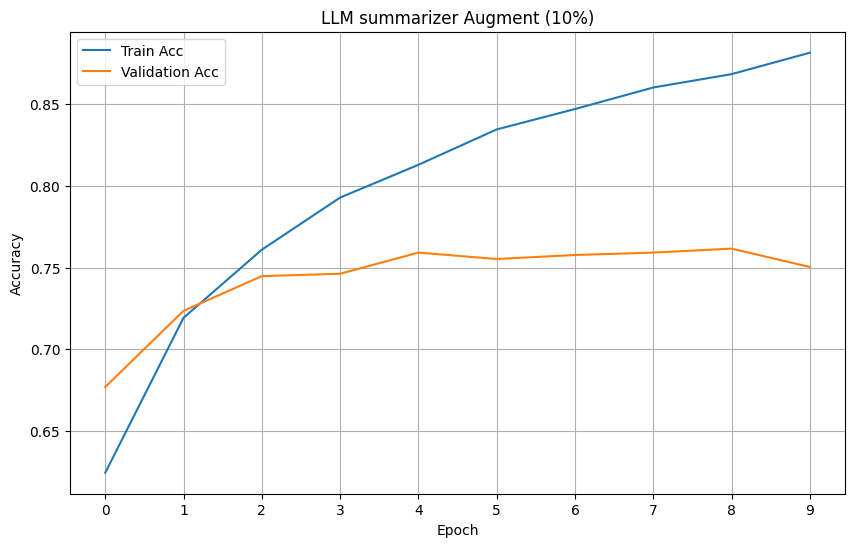

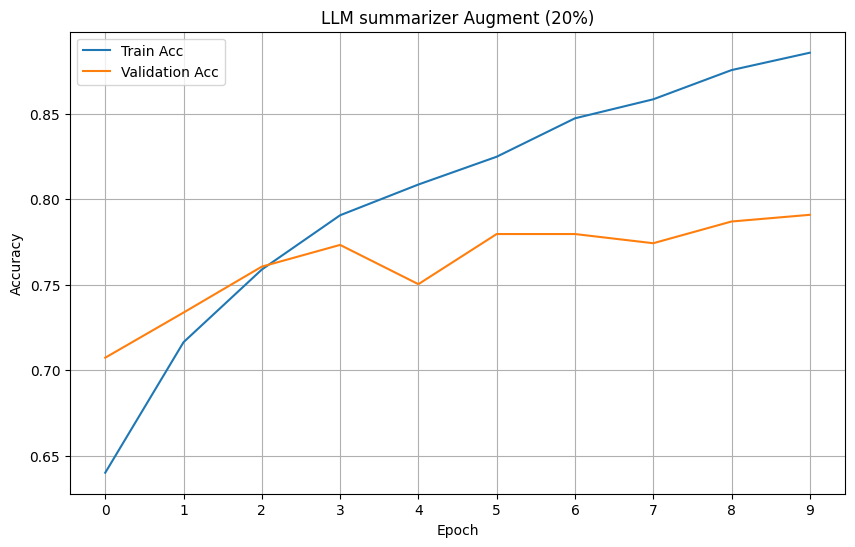

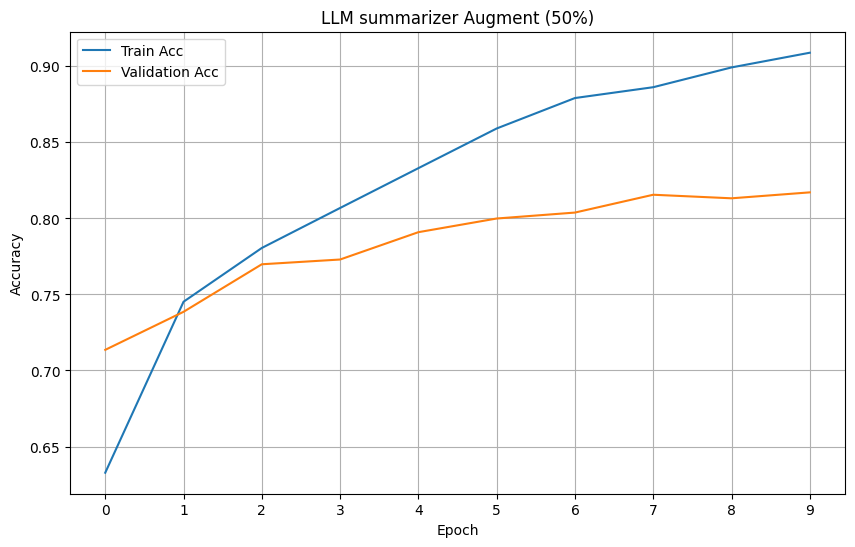

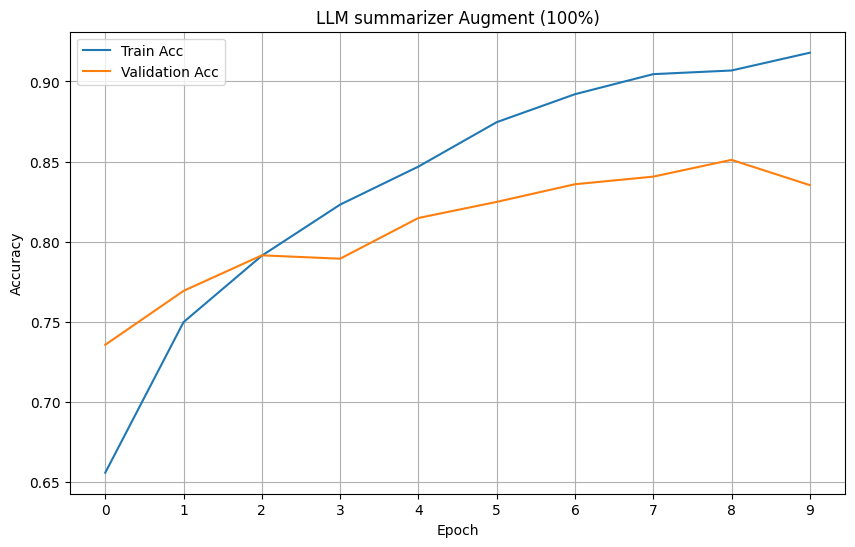

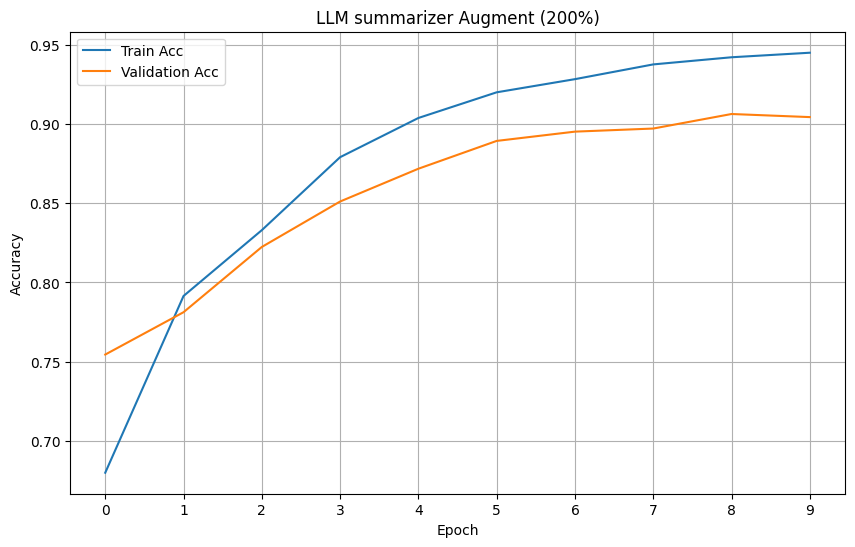

In [15]:
pipeline_summarizer_5.plot_acc(title="LLM summarizer Augment (5%)")
pipeline_summarizer_10.plot_acc(title="LLM summarizer Augment (10%)")
pipeline_summarizer_20.plot_acc(title="LLM summarizer Augment (20%)")
pipeline_summarizer_50.plot_acc(title="LLM summarizer Augment (50%)")
pipeline_summarizer_100.plot_acc(title="LLM summarizer Augment (100%)")
pipeline_summarizer_200.plot_acc(title="LLM summarizer Augment (200%)")

## Using the Augmented Datasets on LSTM Model

In [16]:
pipeline_summarizer_5_LSTM= TextClassificationPipeline(
    augmented_data=augmented_llm_summarizer_train_data_5, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)

pipeline_summarizer_10_LSTM= TextClassificationPipeline(
    augmented_data=augmented_llm_summarizer_train_data_10, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)

pipeline_summarizer_20_LSTM= TextClassificationPipeline(
    augmented_data=augmented_llm_summarizer_train_data_20, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)

pipeline_summarizer_50_LSTM= TextClassificationPipeline(
    augmented_data=augmented_llm_summarizer_train_data_50, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)

pipeline_summarizer_100_LSTM= TextClassificationPipeline(
    augmented_data=augmented_llm_summarizer_train_data_100, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)

pipeline_summarizer_200_LSTM= TextClassificationPipeline(
    augmented_data=augmented_llm_summarizer_train_data_200, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)

pipeline_summarizer_5_LSTM.train_model(n_epochs=10)
pipeline_summarizer_10_LSTM.train_model(n_epochs=10)
pipeline_summarizer_20_LSTM.train_model(n_epochs=10)
pipeline_summarizer_50_LSTM.train_model(n_epochs=10)
pipeline_summarizer_100_LSTM.train_model(n_epochs=10)
pipeline_summarizer_200_LSTM.train_model(n_epochs=10)

Map:   0%|          | 0/8956 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7164 [00:00<?, ? examples/s]

Map:   0%|          | 0/1792 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/9382 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7505 [00:00<?, ? examples/s]

Map:   0%|          | 0/1877 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10235 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/8188 [00:00<?, ? examples/s]

Map:   0%|          | 0/2047 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/12794 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10235 [00:00<?, ? examples/s]

Map:   0%|          | 0/2559 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/17058 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/13646 [00:00<?, ? examples/s]

Map:   0%|          | 0/3412 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/25586 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/20468 [00:00<?, ? examples/s]

Map:   0%|          | 0/5118 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]


Epoch: 1/10
Train Loss: 0.687, Train Acc: 0.560
Valid Loss: 0.651, Valid Acc: 0.670


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]


Epoch: 2/10
Train Loss: 0.610, Train Acc: 0.686
Valid Loss: 0.569, Valid Acc: 0.746


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]


Epoch: 3/10
Train Loss: 0.555, Train Acc: 0.746
Valid Loss: 0.552, Valid Acc: 0.751


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]


Epoch: 4/10
Train Loss: 0.531, Train Acc: 0.771
Valid Loss: 0.546, Valid Acc: 0.759


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]


Epoch: 5/10
Train Loss: 0.506, Train Acc: 0.799
Valid Loss: 0.559, Valid Acc: 0.731


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]


Epoch: 6/10
Train Loss: 0.505, Train Acc: 0.799
Valid Loss: 0.544, Valid Acc: 0.754


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]


Epoch: 7/10
Train Loss: 0.478, Train Acc: 0.830
Valid Loss: 0.538, Valid Acc: 0.764


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]


Epoch: 8/10
Train Loss: 0.468, Train Acc: 0.843
Valid Loss: 0.563, Valid Acc: 0.745


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]


Epoch: 9/10
Train Loss: 0.463, Train Acc: 0.850
Valid Loss: 0.536, Valid Acc: 0.770


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]


Epoch: 10/10
Train Loss: 0.451, Train Acc: 0.861
Valid Loss: 0.549, Valid Acc: 0.751


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]


Epoch: 1/10
Train Loss: 0.680, Train Acc: 0.574
Valid Loss: 0.640, Valid Acc: 0.641


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]


Epoch: 2/10
Train Loss: 0.591, Train Acc: 0.706
Valid Loss: 0.583, Valid Acc: 0.720


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.51it/s]


Epoch: 3/10
Train Loss: 0.543, Train Acc: 0.759
Valid Loss: 0.558, Valid Acc: 0.740


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]


Epoch: 4/10
Train Loss: 0.526, Train Acc: 0.775
Valid Loss: 0.575, Valid Acc: 0.725


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]


Epoch: 5/10
Train Loss: 0.512, Train Acc: 0.793
Valid Loss: 0.557, Valid Acc: 0.749


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]


Epoch: 6/10
Train Loss: 0.488, Train Acc: 0.817
Valid Loss: 0.551, Valid Acc: 0.757


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]


Epoch: 7/10
Train Loss: 0.478, Train Acc: 0.829
Valid Loss: 0.543, Valid Acc: 0.760


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]


Epoch: 8/10
Train Loss: 0.468, Train Acc: 0.837
Valid Loss: 0.566, Valid Acc: 0.736


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]


Epoch: 9/10
Train Loss: 0.461, Train Acc: 0.849
Valid Loss: 0.549, Valid Acc: 0.760


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]


Epoch: 10/10
Train Loss: 0.448, Train Acc: 0.864
Valid Loss: 0.555, Valid Acc: 0.755


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]


Epoch: 1/10
Train Loss: 0.681, Train Acc: 0.571
Valid Loss: 0.631, Valid Acc: 0.660


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]


Epoch: 2/10
Train Loss: 0.593, Train Acc: 0.704
Valid Loss: 0.563, Valid Acc: 0.741


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]


Epoch: 3/10
Train Loss: 0.547, Train Acc: 0.752
Valid Loss: 0.558, Valid Acc: 0.743


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]


Epoch: 4/10
Train Loss: 0.522, Train Acc: 0.777
Valid Loss: 0.533, Valid Acc: 0.767


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]


Epoch: 5/10
Train Loss: 0.492, Train Acc: 0.814
Valid Loss: 0.534, Valid Acc: 0.765


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]


Epoch: 6/10
Train Loss: 0.474, Train Acc: 0.835
Valid Loss: 0.546, Valid Acc: 0.760


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]


Epoch: 7/10
Train Loss: 0.463, Train Acc: 0.846
Valid Loss: 0.536, Valid Acc: 0.768


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.26it/s]


Epoch: 8/10
Train Loss: 0.449, Train Acc: 0.864
Valid Loss: 0.538, Valid Acc: 0.767


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]


Epoch: 9/10
Train Loss: 0.446, Train Acc: 0.864
Valid Loss: 0.533, Valid Acc: 0.774


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]


Epoch: 10/10
Train Loss: 0.437, Train Acc: 0.876
Valid Loss: 0.536, Valid Acc: 0.772


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.22it/s]


Epoch: 1/10
Train Loss: 0.674, Train Acc: 0.584
Valid Loss: 0.611, Valid Acc: 0.689


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.16it/s]


Epoch: 2/10
Train Loss: 0.569, Train Acc: 0.731
Valid Loss: 0.547, Valid Acc: 0.748


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.29it/s]


Epoch: 3/10
Train Loss: 0.515, Train Acc: 0.788
Valid Loss: 0.529, Valid Acc: 0.772


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]


Epoch: 4/10
Train Loss: 0.485, Train Acc: 0.825
Valid Loss: 0.522, Valid Acc: 0.784


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.27it/s]


Epoch: 5/10
Train Loss: 0.472, Train Acc: 0.836
Valid Loss: 0.521, Valid Acc: 0.787


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.26it/s]


Epoch: 6/10
Train Loss: 0.468, Train Acc: 0.842
Valid Loss: 0.528, Valid Acc: 0.780


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.30it/s]


Epoch: 7/10
Train Loss: 0.448, Train Acc: 0.863
Valid Loss: 0.513, Valid Acc: 0.793


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]


Epoch: 8/10
Train Loss: 0.432, Train Acc: 0.880
Valid Loss: 0.505, Valid Acc: 0.803


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.36it/s]


Epoch: 9/10
Train Loss: 0.422, Train Acc: 0.892
Valid Loss: 0.503, Valid Acc: 0.807


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.35it/s]


Epoch: 10/10
Train Loss: 0.416, Train Acc: 0.898
Valid Loss: 0.501, Valid Acc: 0.810


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.33it/s]


Epoch: 1/10
Train Loss: 0.663, Train Acc: 0.599
Valid Loss: 0.605, Valid Acc: 0.699


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.29it/s]


Epoch: 2/10
Train Loss: 0.560, Train Acc: 0.742
Valid Loss: 0.549, Valid Acc: 0.742


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.28it/s]


Epoch: 3/10
Train Loss: 0.513, Train Acc: 0.793
Valid Loss: 0.520, Valid Acc: 0.784


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]


Epoch: 4/10
Train Loss: 0.483, Train Acc: 0.821
Valid Loss: 0.511, Valid Acc: 0.794


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]


Epoch: 5/10
Train Loss: 0.460, Train Acc: 0.850
Valid Loss: 0.507, Valid Acc: 0.793


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]


Epoch: 6/10
Train Loss: 0.452, Train Acc: 0.860
Valid Loss: 0.500, Valid Acc: 0.812


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.34it/s]


Epoch: 7/10
Train Loss: 0.449, Train Acc: 0.861
Valid Loss: 0.517, Valid Acc: 0.792


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.33it/s]


Epoch: 8/10
Train Loss: 0.439, Train Acc: 0.874
Valid Loss: 0.495, Valid Acc: 0.814


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.33it/s]


Epoch: 9/10
Train Loss: 0.427, Train Acc: 0.885
Valid Loss: 0.506, Valid Acc: 0.804


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.27it/s]


Epoch: 10/10
Train Loss: 0.428, Train Acc: 0.884
Valid Loss: 0.498, Valid Acc: 0.812


evaluating...: 100%|██████████| 10/10 [00:04<00:00,  2.03it/s]


Epoch: 1/10
Train Loss: 0.633, Train Acc: 0.640
Valid Loss: 0.552, Valid Acc: 0.745


evaluating...: 100%|██████████| 10/10 [00:04<00:00,  2.08it/s]


Epoch: 2/10
Train Loss: 0.506, Train Acc: 0.798
Valid Loss: 0.506, Valid Acc: 0.799


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]


Epoch: 3/10
Train Loss: 0.458, Train Acc: 0.853
Valid Loss: 0.473, Valid Acc: 0.837


evaluating...: 100%|██████████| 10/10 [00:04<00:00,  2.05it/s]


Epoch: 4/10
Train Loss: 0.434, Train Acc: 0.876
Valid Loss: 0.458, Valid Acc: 0.852


evaluating...: 100%|██████████| 10/10 [00:04<00:00,  2.04it/s]


Epoch: 5/10
Train Loss: 0.420, Train Acc: 0.892
Valid Loss: 0.448, Valid Acc: 0.861


evaluating...: 100%|██████████| 10/10 [00:04<00:00,  2.05it/s]


Epoch: 6/10
Train Loss: 0.414, Train Acc: 0.898
Valid Loss: 0.440, Valid Acc: 0.871


evaluating...: 100%|██████████| 10/10 [00:04<00:00,  2.07it/s]


Epoch: 7/10
Train Loss: 0.399, Train Acc: 0.912
Valid Loss: 0.436, Valid Acc: 0.874


evaluating...: 100%|██████████| 10/10 [00:04<00:00,  2.09it/s]


Epoch: 8/10
Train Loss: 0.396, Train Acc: 0.916
Valid Loss: 0.439, Valid Acc: 0.873


evaluating...: 100%|██████████| 10/10 [00:04<00:00,  2.05it/s]


Epoch: 9/10
Train Loss: 0.399, Train Acc: 0.914
Valid Loss: 0.431, Valid Acc: 0.880


evaluating...: 100%|██████████| 10/10 [00:04<00:00,  2.12it/s]

Epoch: 10/10
Train Loss: 0.389, Train Acc: 0.923
Valid Loss: 0.428, Valid Acc: 0.884


## Performance of LSTM

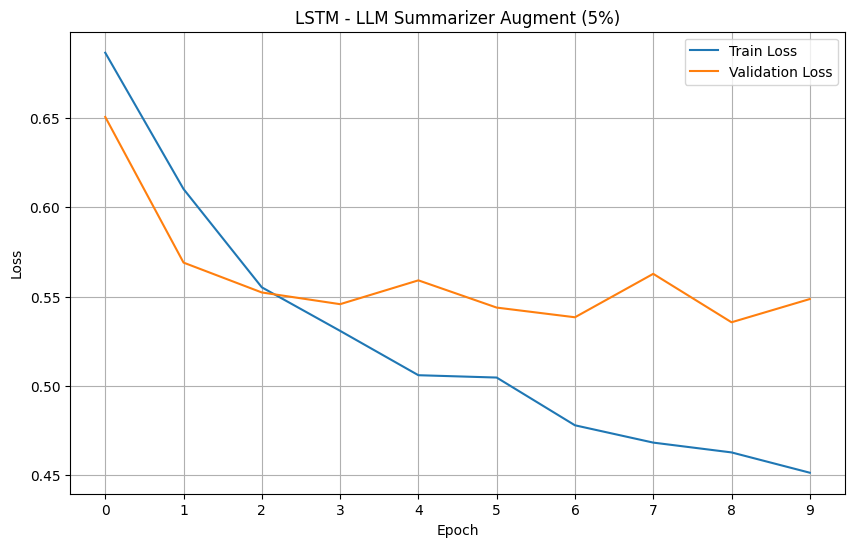

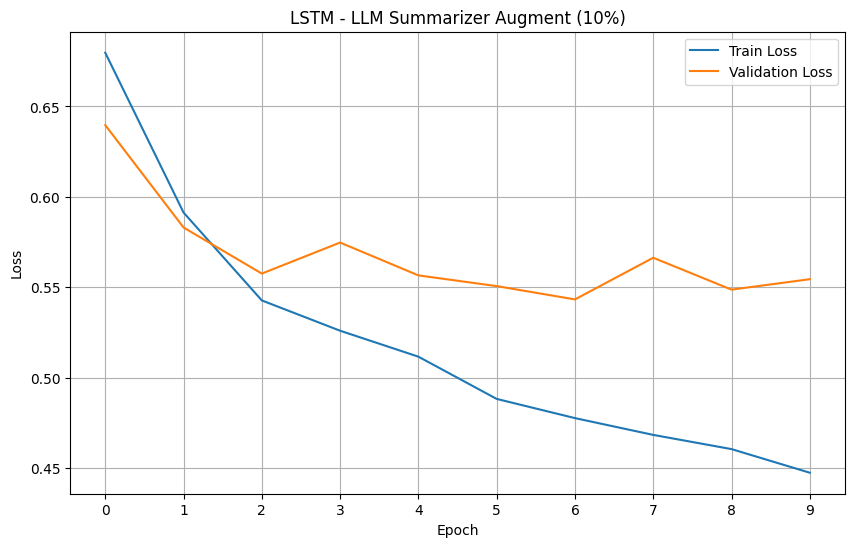

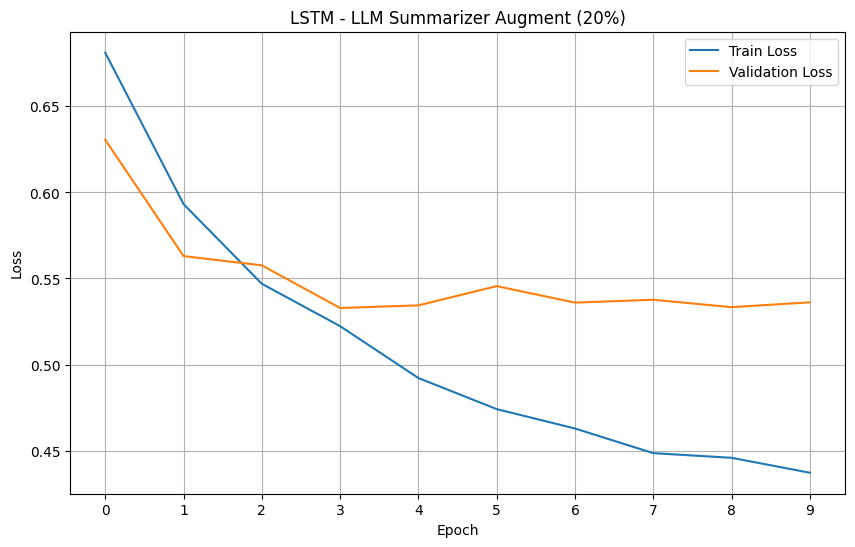

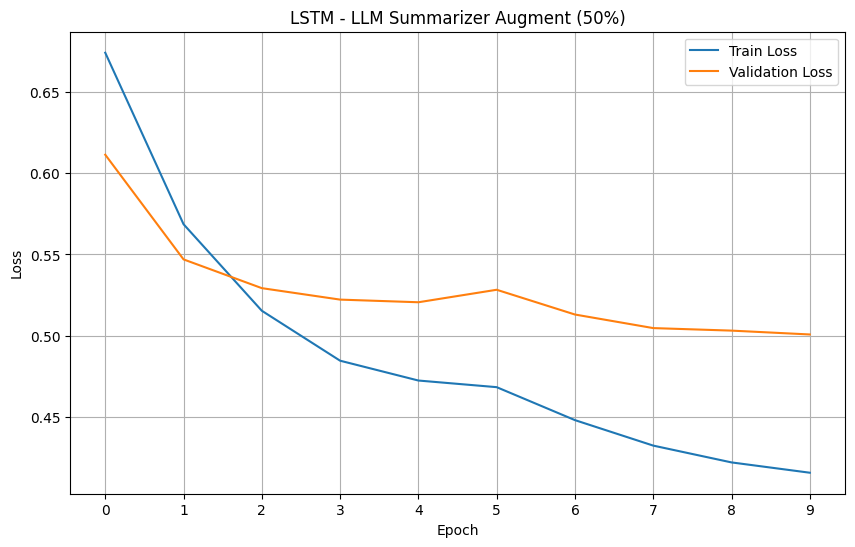

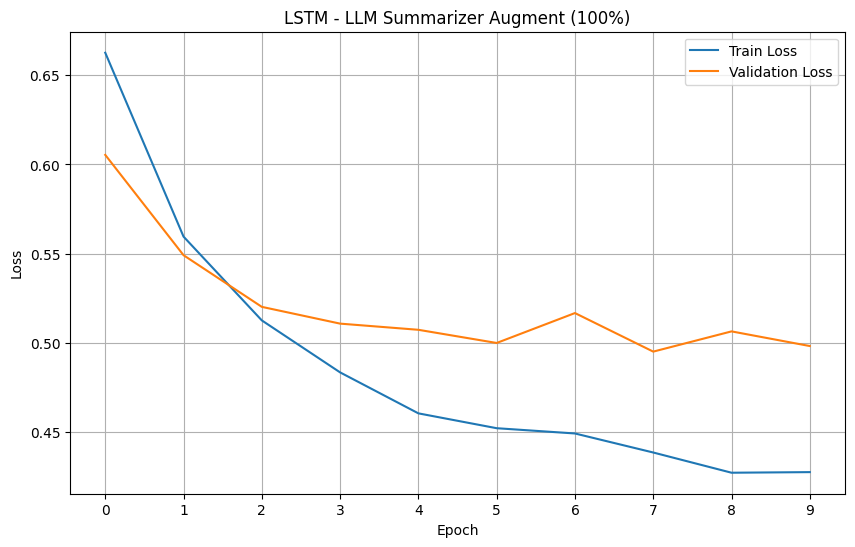

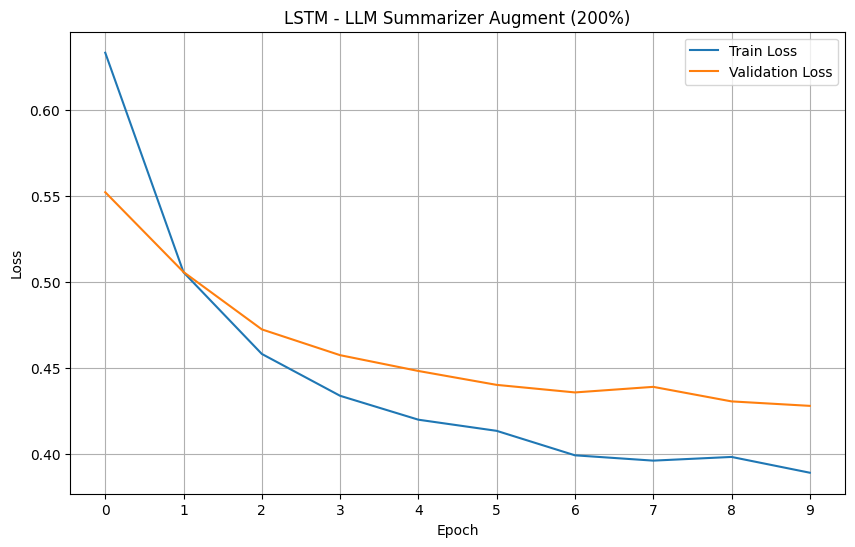

In [17]:
pipeline_summarizer_5_LSTM.plot_loss(title="LSTM - LLM Summarizer Augment (5%)")
pipeline_summarizer_10_LSTM.plot_loss(title="LSTM - LLM Summarizer Augment (10%)")
pipeline_summarizer_20_LSTM.plot_loss(title="LSTM - LLM Summarizer Augment (20%)")
pipeline_summarizer_50_LSTM.plot_loss(title="LSTM - LLM Summarizer Augment (50%)")
pipeline_summarizer_100_LSTM.plot_loss(title="LSTM - LLM Summarizer Augment (100%)")
pipeline_summarizer_200_LSTM.plot_loss(title="LSTM - LLM Summarizer Augment (200%)")

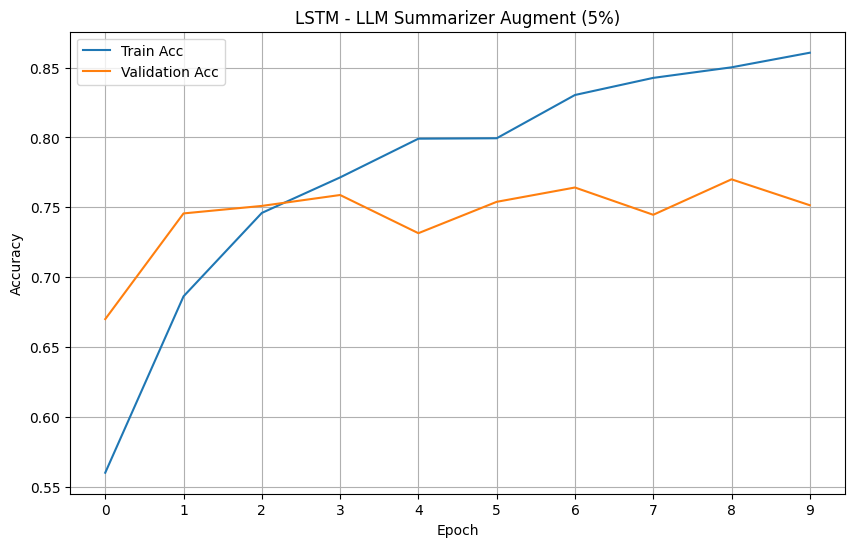

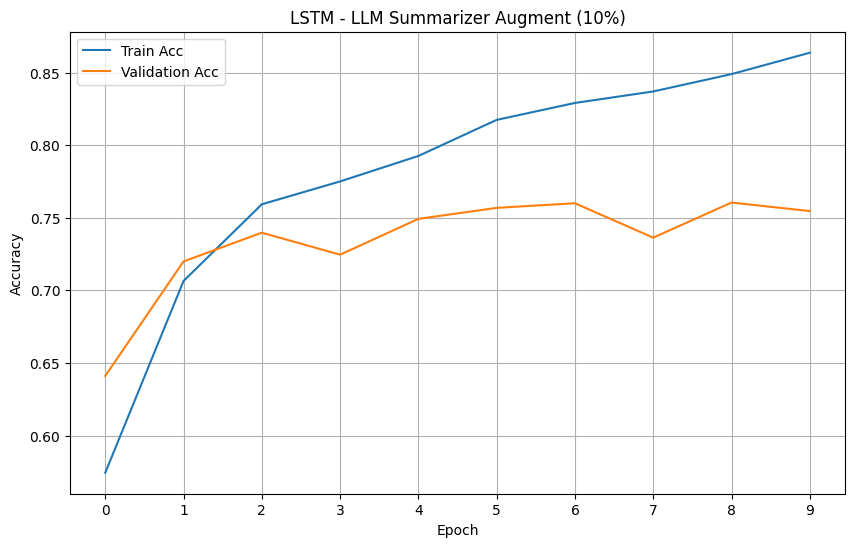

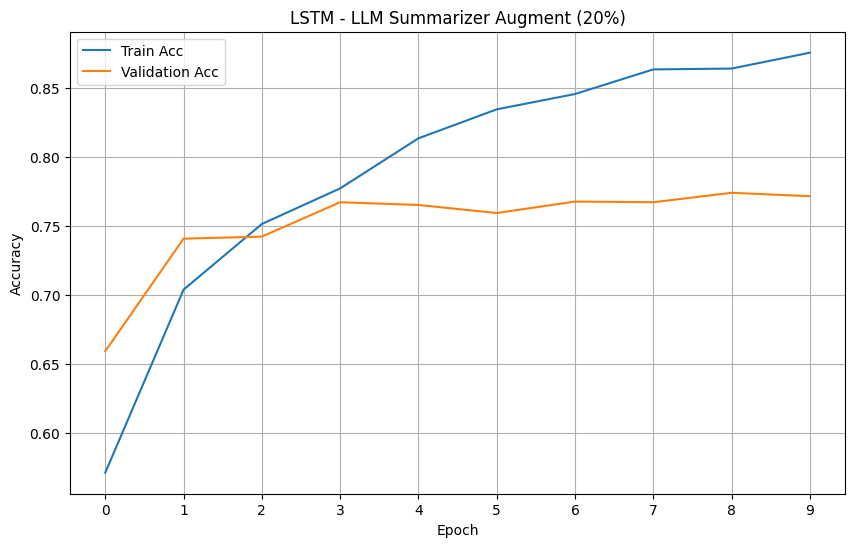

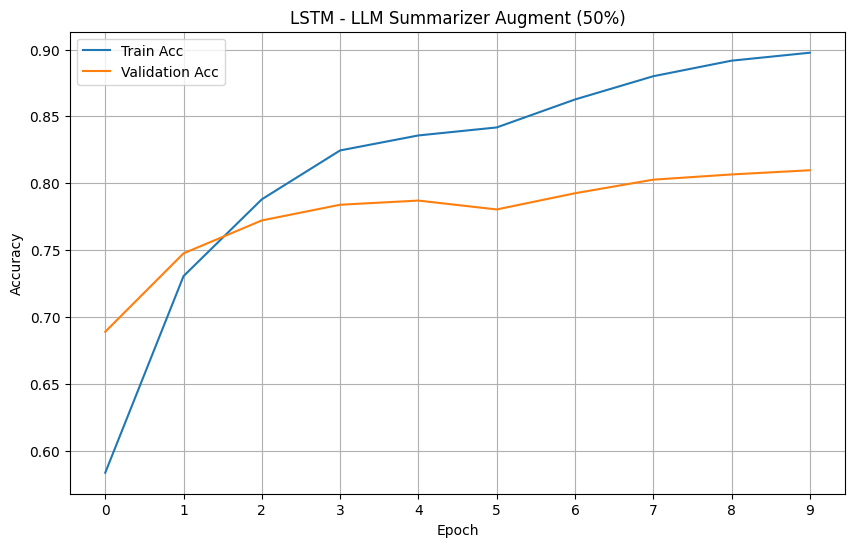

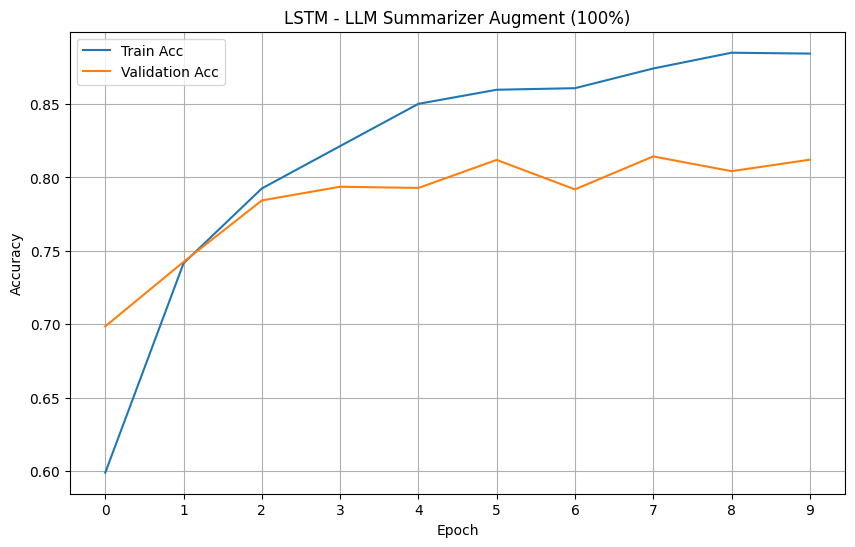

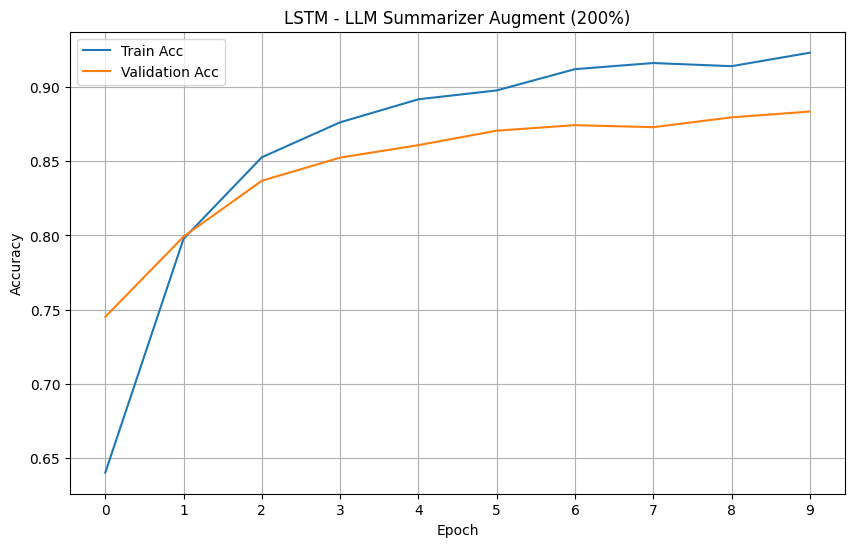

In [18]:
pipeline_summarizer_5_LSTM.plot_acc(title="LSTM - LLM Summarizer Augment (5%)")
pipeline_summarizer_10_LSTM.plot_acc(title="LSTM - LLM Summarizer Augment (10%)")
pipeline_summarizer_20_LSTM.plot_acc(title="LSTM - LLM Summarizer Augment (20%)")
pipeline_summarizer_50_LSTM.plot_acc(title="LSTM - LLM Summarizer Augment (50%)")
pipeline_summarizer_100_LSTM.plot_acc(title="LSTM - LLM Summarizer Augment (100%)")
pipeline_summarizer_200_LSTM.plot_acc(title="LSTM - LLM Summarizer Augment (200%)")